In [292]:
import pandas as pd
import numpy as np
import missingno as mano
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
import re
import statistics
import pylab 
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from scikit import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.stats import anderson
from statistics import mode
import warnings
import seaborn as sb
import math
import warnings
import sklearn    
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn import preprocessing

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

#import split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold
get_ipython().run_line_magic('matplotlib', 'inline')
# import scaling
from sklearn.preprocessing import StandardScaler


In [70]:
pip install xgboost

In [293]:
data = pd.read_csv('globalterror.csv' ,encoding= 'ISO-8859-1')  
print(f'Data Shape is {data.shape}')
data.head()

C:\Users\hifza\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data Shape is (181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [295]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [296]:
data.describe

<bound method NDFrame.describe of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  regi

In [297]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [298]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [299]:
data.isnull().sum().sort_values(ascending=False).head(30)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
claimmode3          181558
claimmode3_txt      181558
gsubname2           181531
claim3              181373
guncertain3         181371
gname3              181367
divert              181367
attacktype3         181263
attacktype3_txt     181263
ransomnote          181177
ransompaidus        181139
ransomamtus         181128
claimmode2          181075
claimmode2_txt      181075
ransompaid          180917
corp3               180665
targsubtype3        180594
targsubtype3_txt    180594
natlty3             180544
natlty3_txt         180544
target3             180516
targtype3_txt       180515
targtype3           180515
ransomamt           180341
weapsubtype3        179998
dtype: int64

In [300]:
data.country_txt.value_counts().head(15)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: country_txt, dtype: int64

In [301]:
#IRAQ AND PAKISTAN ARE MOST EFFECTED COUNTRIES BY TERRORIST

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


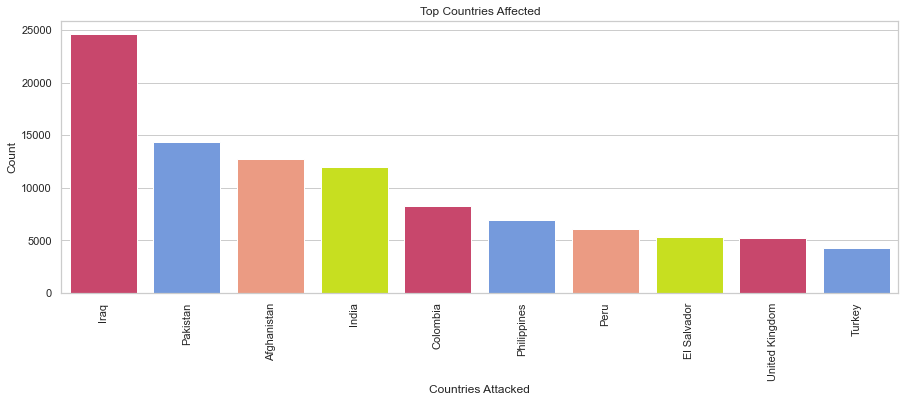

In [302]:
# Visualizing the top 10 attacked countries
plt.figure(figsize = (15,5))
sns.barplot(data['country_txt'].value_counts()[:10].index,data['country_txt'].value_counts()[:10].values,palette=["#de3163","#6495ed","#fc9272", "#DFFF00"])
plt.title('Top Countries Affected')
plt.xlabel('Countries Attacked')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


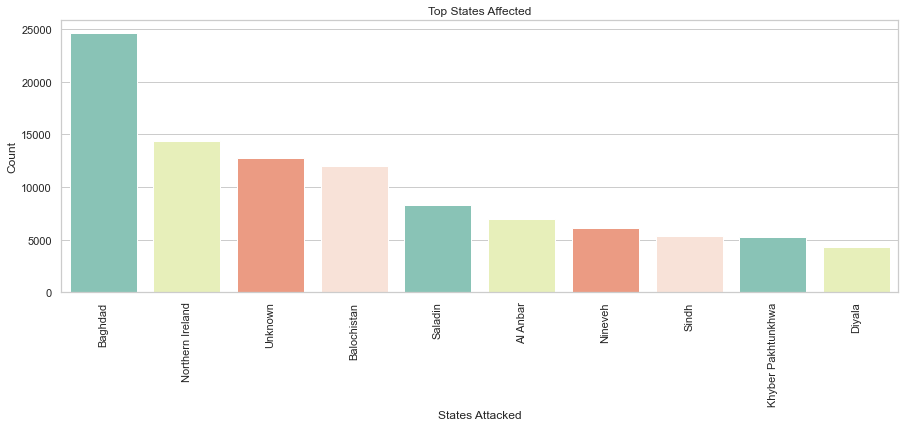

In [16]:
# Visualizing the top 10 attacked states
plt.figure(figsize = (15,5))
sns.barplot(data['provstate'].value_counts()[:10].index,data['country_txt'].value_counts()[:10].values,palette=["#7fcdbb","#edf8b1","#fc9272", "#fee0d2"])
plt.title('Top States Affected')
plt.xlabel('States Attacked')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Attacks in year (1970-2017)')

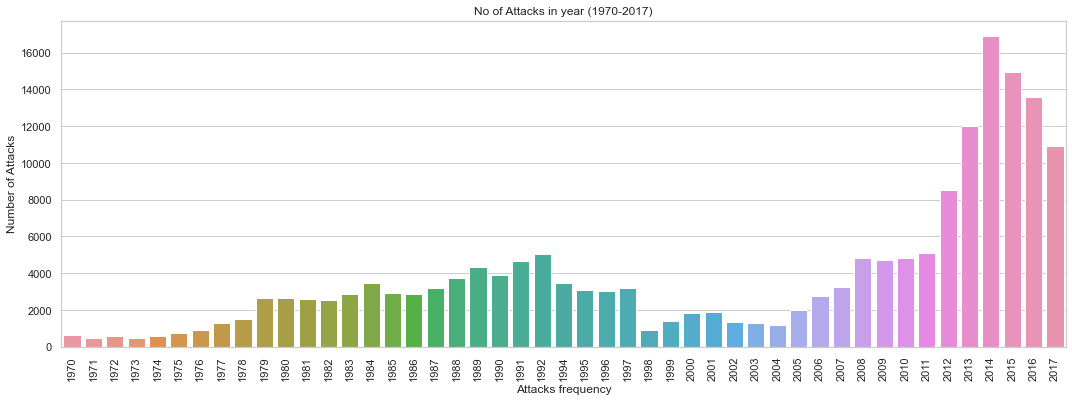

In [303]:
# Countplot of attacks in recent years
plt.figure(figsize=(18,6))
sns.countplot(data['iyear'])
plt.xlabel("Attacks frequency")
plt.xticks(rotation=90)
plt.ylabel("Number of Attacks")
plt.title("No of Attacks in year (1970-2017)")

Cleaning data

In [304]:
#FUNCTION TO DROP THE COLUMNS
def drop(feature) :
    global data
    data.drop([feature],axis=1, inplace=True)
    data.head()
#FUNCTION TO CHECK THE UNIQUE VALUES IN COLUMNS
def unique(feature) : 
    global data
    print(f'Number of unique vaure are {len(list(data[feature].unique()))} which are : \n {list(data[feature].unique())}')

def unique_all(show_value = True) : 
    global data
    for col in data.columns : 
        print(f'Length of unique data for   {col}   is    {len(data[col].unique())} ')
        if show_value == True  : 
            print(f'unique values ae {data[col].unique()}' )
            print('-----------------------------')
#DROPPING ON THE BASIS OF NULLS
def drop_nulls(percentage = 0.30) : 
    global data
    for col in data.columns : 
        ratio =  data[col].isna().sum()/data.shape[0]
        if ratio >= percentage : 
            data.drop([col],axis=1, inplace=True)
            print(f'Column {col} has been dropped since nulls percentage is {round(ratio *100)} %')

def count_nulls() : 
    global data
    for col in data.columns : 
        if not data[col].isna().sum() == 0 : 
            print(f'Column {col} has been number of nulls {data[col].isna().sum()}')

def fillna(feature , val = 'none') : 
    global data
    data[feature].fillna(val, inplace=True)

def cplot(feature) : 
    global data
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

def spie(series) : 
    global data
    plt.pie(series.values,labels=list(series.index),autopct ='%1.2f%%',labeldistance = 1.1,explode = [0.05 for i in range(len(series.values))])
    plt.show()

def pie(feature) : 
    global data
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()

def make_xy(feature) : 
    global data
    X = data.drop([feature], axis=1, inplace=False)
    y = data[feature]
    return X , y
   
def encoder(feature , new_feature, drop = True) : 
    global data
    enc  = LabelEncoder()
    enc.fit(data[feature])
    data[new_feature] = enc.transform(data[feature])
    if drop == True : 
        data.drop([feature],axis=1, inplace=True)
    
def max_counts(feature, number, return_rest = False) : 
    global data
    counts = data[feature].value_counts()
    values_list = list(counts[:number].values)
    rest_value =  sum(counts.values) - sum (values_list)
    index_list = list(counts[:number].index)

    if return_rest : 
        values_list.append(rest_value )
        index_list.append('rest items')

    result = pd.Series(values_list, index=index_list)

    if len(data[feature]) <= number : 
        result = None
    return result

def remove_zero(feature , val = 0) :
    global data
    data = data[data[feature] != val]
    





In [305]:
#HERE CHECKING SOME DEAILS AND MORE INSIGHT OF DIFFERENT FEATURES TO UNDERSTAND THE DATA IN BETTER WAYB

In [306]:
def show_details() : 
    global data
    for col in data.columns : 
        print(f'for feature : {col}')
        print(f'Number of Nulls is   {data[col].isna().sum()}')
        print(f'Number of Unique values is   {len(data[col].unique())}')
        print(f'random Value {data[col][0]}')
        print(f'random Value {data[col][10]}')
        print(f'random Value {data[col][20]}')
        print('--------------------------')
show_details()

for feature : eventid
Number of Nulls is   0
Number of Unique values is   181691
random Value 197000000001
random Value 197001050001
random Value 197001140001
--------------------------
for feature : iyear
Number of Nulls is   0
Number of Unique values is   47
random Value 1970
random Value 1970
random Value 1970
--------------------------
for feature : imonth
Number of Nulls is   0
Number of Unique values is   13
random Value 7
random Value 1
random Value 1
--------------------------
for feature : iday
Number of Nulls is   0
Number of Unique values is   32
random Value 2
random Value 1
random Value 14
--------------------------
for feature : approxdate
Number of Nulls is   172452
Number of Unique values is   2245
random Value nan
random Value nan
random Value nan
--------------------------
for feature : extended
Number of Nulls is   0
Number of Unique values is   2
random Value 0
random Value 0
random Value 0
--------------------------
for feature : resolution
Number of Nulls is   179

Number of Unique values is   434
random Value nan
random Value nan
random Value nan
--------------------------
for feature : gsubname2
Number of Nulls is   181531
Number of Unique values is   61
random Value nan
random Value nan
random Value nan
--------------------------
for feature : gname3
Number of Nulls is   181367
Number of Unique values is   117
random Value nan
random Value nan
random Value nan
--------------------------
for feature : gsubname3
Number of Nulls is   181671
Number of Unique values is   15
random Value nan
random Value nan
random Value nan
--------------------------
for feature : motive
Number of Nulls is   131130
Number of Unique values is   14491
random Value nan
random Value nan
random Value nan
--------------------------
for feature : guncertain1
Number of Nulls is   380
Number of Unique values is   3
random Value 0.0
random Value 0.0
random Value 0.0
--------------------------
for feature : guncertain2
Number of Nulls is   179736
Number of Unique values is   

Number of Nulls is   181177
Number of Unique values is   388
random Value nan
random Value nan
random Value nan
--------------------------
for feature : hostkidoutcome
Number of Nulls is   170700
Number of Unique values is   8
random Value nan
random Value nan
random Value nan
--------------------------
for feature : hostkidoutcome_txt
Number of Nulls is   170700
Number of Unique values is   8
random Value nan
random Value nan
random Value nan
--------------------------
for feature : nreleased
Number of Nulls is   171291
Number of Unique values is   157
random Value nan
random Value nan
random Value nan
--------------------------
for feature : addnotes
Number of Nulls is   153402
Number of Unique values is   15430
random Value nan
random Value nan
random Value nan
--------------------------
for feature : scite1
Number of Nulls is   66191
Number of Unique values is   83989
random Value nan
random Value nan
random Value Committee on Government Operations United States Senate, "Riots, Civ

<AxesSubplot:>

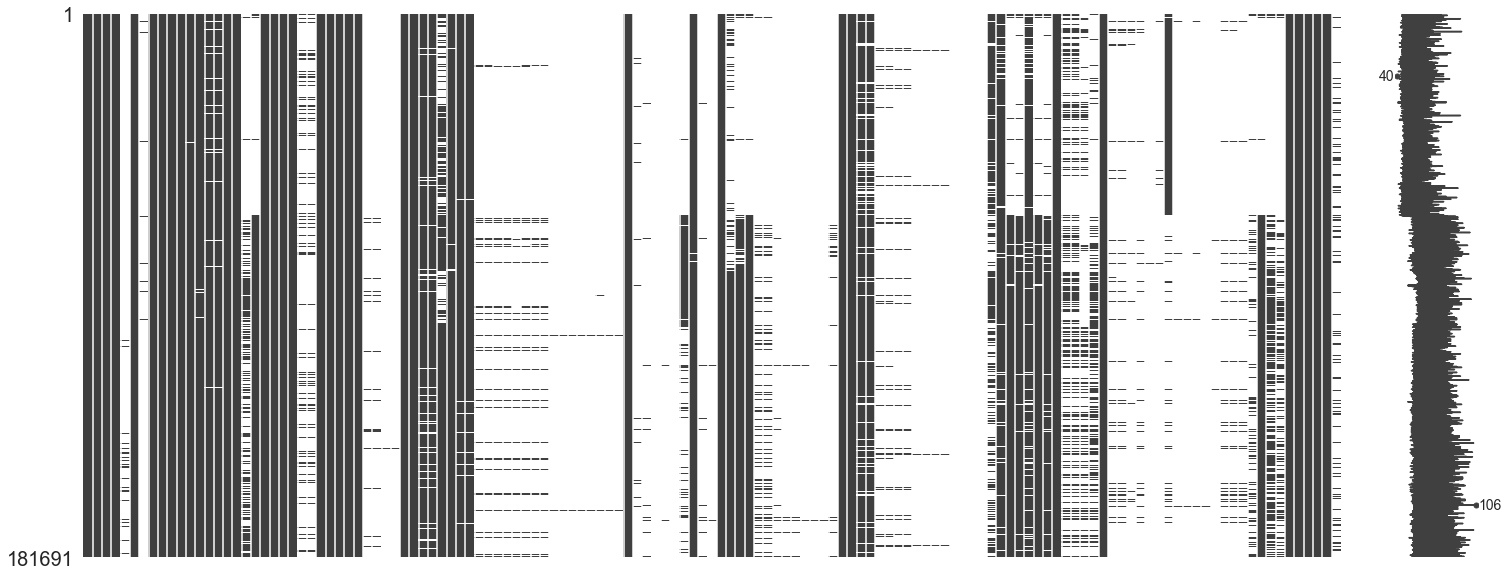

In [20]:

mano.matrix(data)


In [ ]:
#MANO MATRIX TO SEE THE NULL VALUES PRESENT IN OUR DATA

<AxesSubplot:>

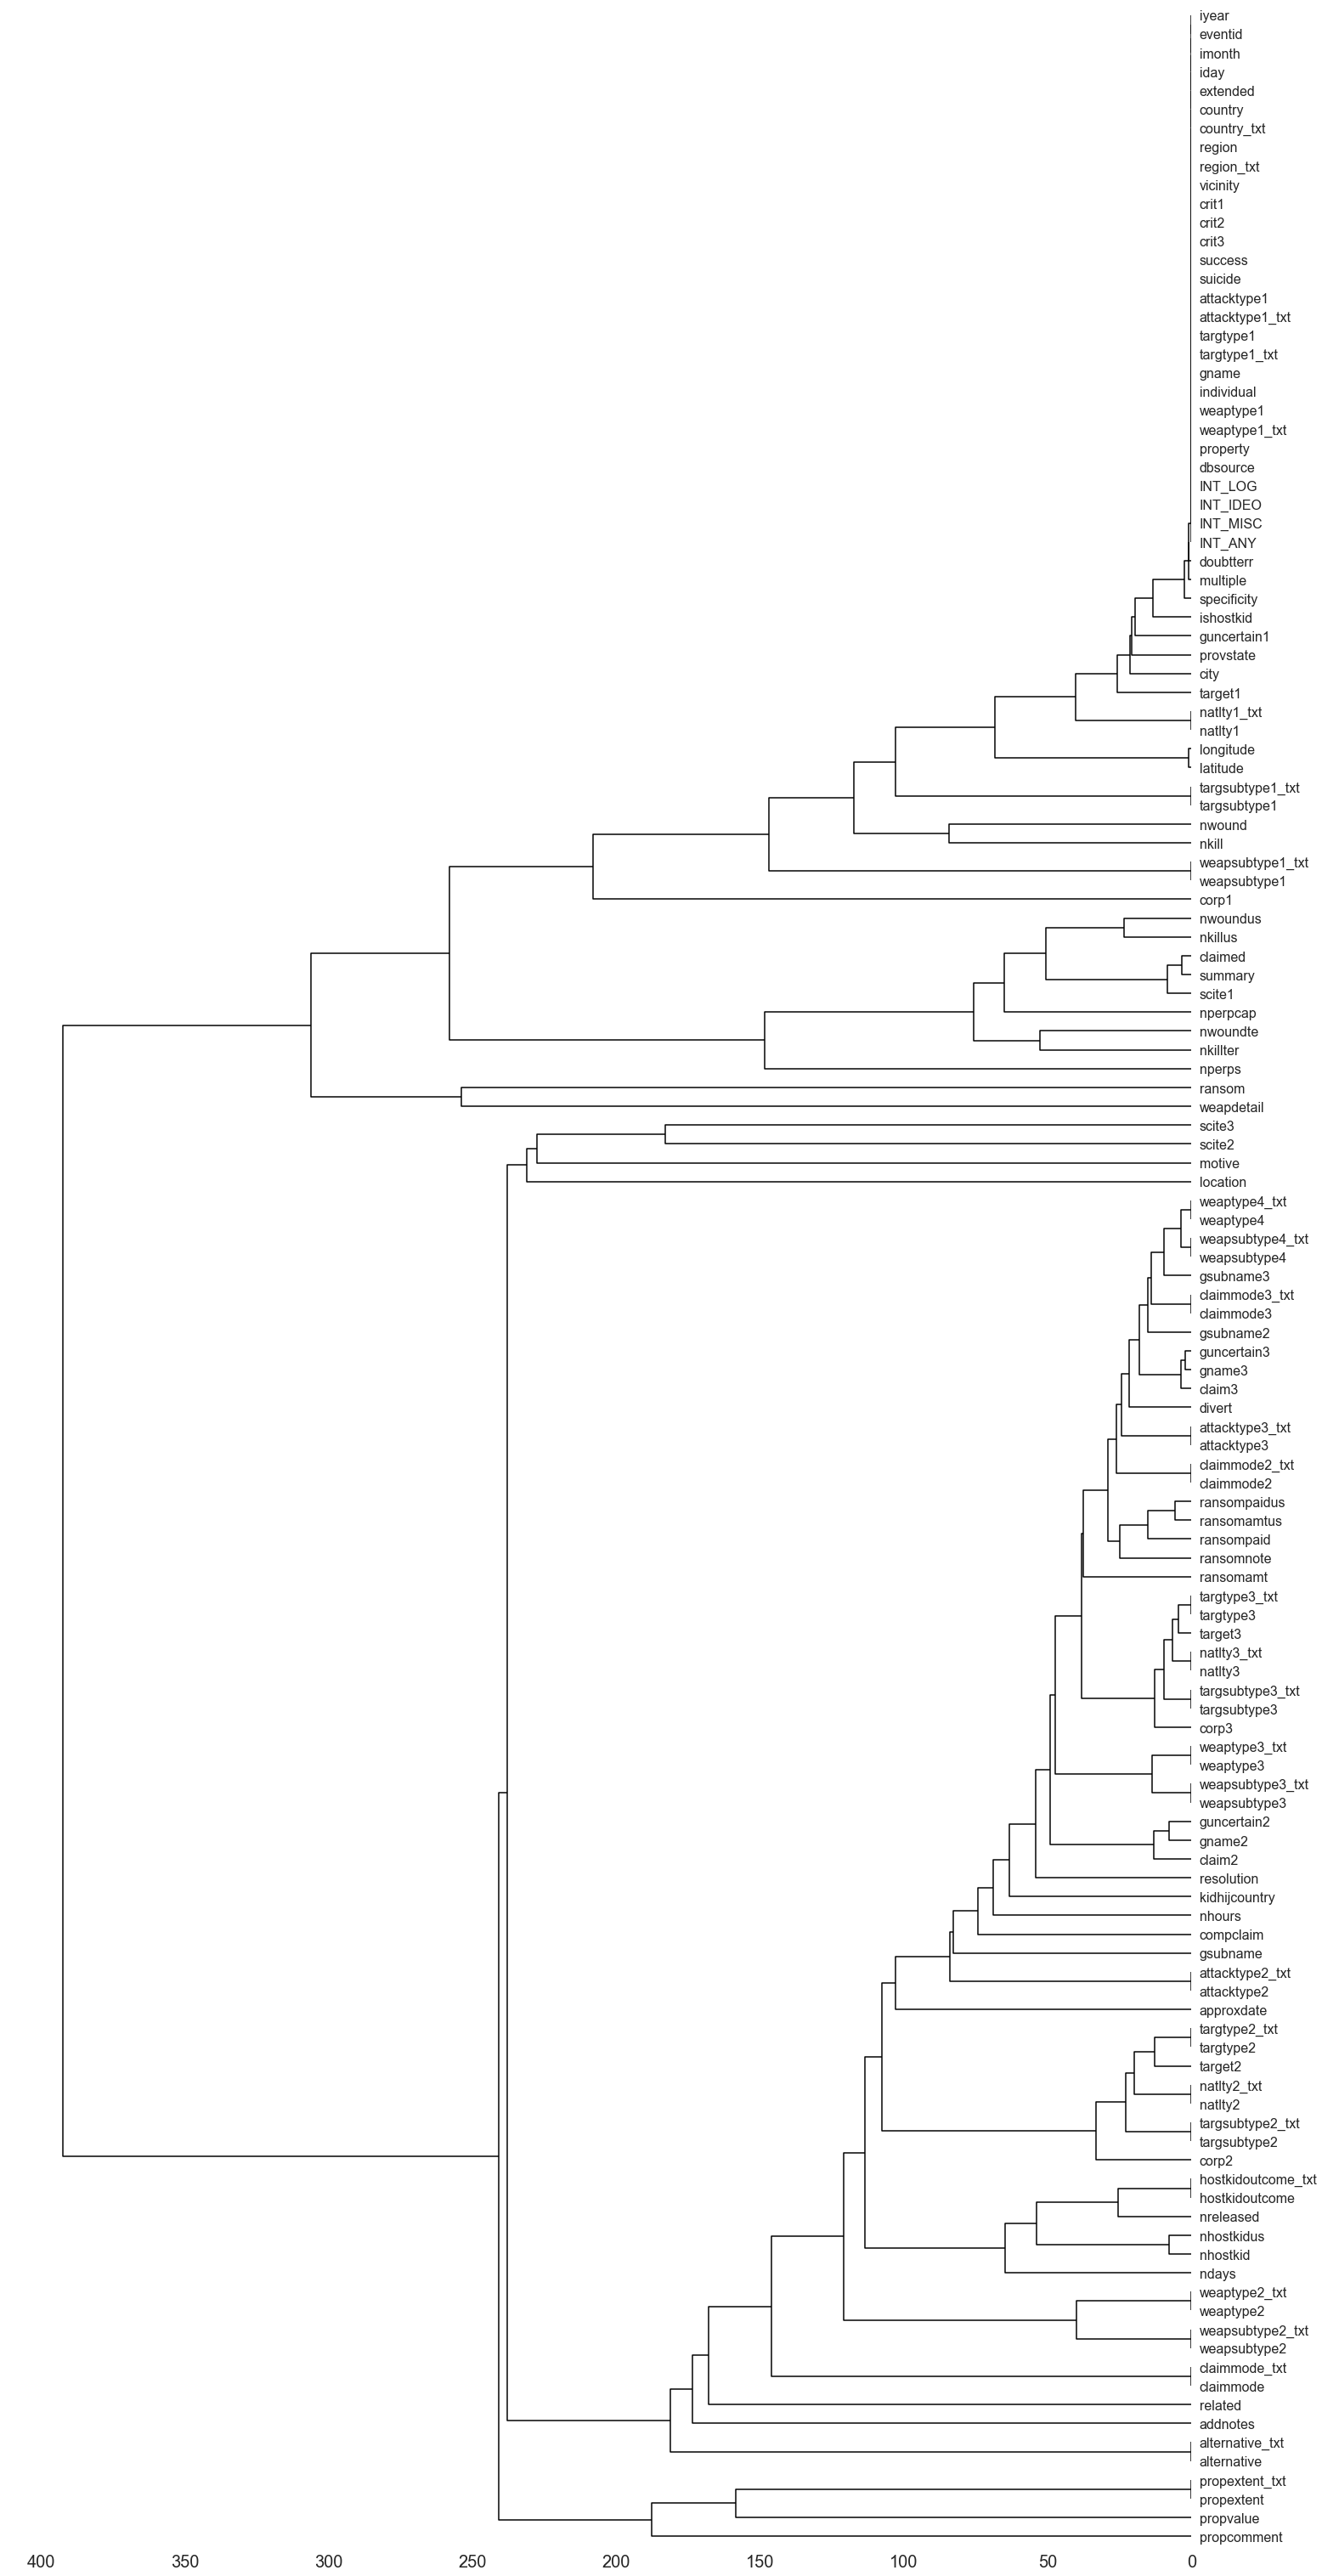

In [21]:
mano.dendrogram(data)

In [22]:
print(data.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [307]:
data.shape

(181691, 135)

In [308]:
drop_nulls()

Column approxdate has been dropped since nulls percentage is 95 %
Column resolution has been dropped since nulls percentage is 99 %
Column location has been dropped since nulls percentage is 69 %
Column summary has been dropped since nulls percentage is 36 %
Column alternative has been dropped since nulls percentage is 84 %
Column alternative_txt has been dropped since nulls percentage is 84 %
Column attacktype2 has been dropped since nulls percentage is 97 %
Column attacktype2_txt has been dropped since nulls percentage is 97 %
Column attacktype3 has been dropped since nulls percentage is 100 %
Column attacktype3_txt has been dropped since nulls percentage is 100 %
Column targtype2 has been dropped since nulls percentage is 94 %
Column targtype2_txt has been dropped since nulls percentage is 94 %
Column targsubtype2 has been dropped since nulls percentage is 94 %
Column targsubtype2_txt has been dropped since nulls percentage is 94 %
Column corp2 has been dropped since nulls percentag

In [309]:
#DROPPING THE FEATURES THAT ARE BASICALLY IDS AND CODE OF CATEGORICAL DATA, THESE AFRE NOT HELPFULL IN OUR DATA

In [310]:
drop('eventid')
drop('country')
drop('region')
drop('attacktype1')
drop('targtype1')
drop('targsubtype1')
drop('natlty1')
drop('weaptype1')
drop('weapsubtype1')

In [311]:
data.shape

(181691, 39)

In [312]:
#now let's have a look to unique values for each feature

In [313]:
unique_all(False)

Length of unique data for   iyear   is    47 
Length of unique data for   imonth   is    13 
Length of unique data for   iday   is    32 
Length of unique data for   extended   is    2 
Length of unique data for   country_txt   is    205 
Length of unique data for   region_txt   is    12 
Length of unique data for   provstate   is    2856 
Length of unique data for   city   is    36675 
Length of unique data for   latitude   is    48323 
Length of unique data for   longitude   is    48040 
Length of unique data for   specificity   is    6 
Length of unique data for   vicinity   is    3 
Length of unique data for   crit1   is    2 
Length of unique data for   crit2   is    2 
Length of unique data for   crit3   is    2 
Length of unique data for   doubtterr   is    4 
Length of unique data for   multiple   is    3 
Length of unique data for   success   is    2 
Length of unique data for   suicide   is    2 
Length of unique data for   attacktype1_txt   is    9 
Length of unique data for

In [314]:
count_nulls()

Column provstate has been number of nulls 421
Column city has been number of nulls 434
Column latitude has been number of nulls 4556
Column longitude has been number of nulls 4557
Column specificity has been number of nulls 6
Column doubtterr has been number of nulls 1
Column multiple has been number of nulls 1
Column targsubtype1_txt has been number of nulls 10373
Column corp1 has been number of nulls 42550
Column target1 has been number of nulls 636
Column natlty1_txt has been number of nulls 1559
Column guncertain1 has been number of nulls 380
Column weapsubtype1_txt has been number of nulls 20768
Column nkill has been number of nulls 10313
Column nwound has been number of nulls 16311
Column ishostkid has been number of nulls 178


In [315]:
show_details()

for feature : iyear
Number of Nulls is   0
Number of Unique values is   47
random Value 1970
random Value 1970
random Value 1970
--------------------------
for feature : imonth
Number of Nulls is   0
Number of Unique values is   13
random Value 7
random Value 1
random Value 1
--------------------------
for feature : iday
Number of Nulls is   0
Number of Unique values is   32
random Value 2
random Value 1
random Value 14
--------------------------
for feature : extended
Number of Nulls is   0
Number of Unique values is   2
random Value 0
random Value 0
random Value 0
--------------------------
for feature : country_txt
Number of Nulls is   0
Number of Unique values is   205
random Value Dominican Republic
random Value United States
random Value United States
--------------------------
for feature : region_txt
Number of Nulls is   0
Number of Unique values is   12
random Value Central America & Caribbean
random Value North America
random Value North America
--------------------------
for

In [316]:
#we have 14 numerical features to handle here which are : iyear , imonth , iday , extended , latitude , longitude , specificity , vicinity , doubtterr , multiple , guncertain1, nkill , nwound & ishostkid

#let's be sure that it got no nulls & all values are suitable

#let's start with iyear

In [317]:
unique('iyear')

Number of unique vaure are 47 which are : 
 [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


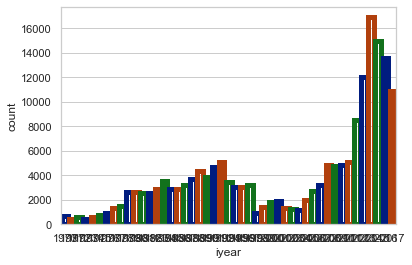

In [318]:
cplot('iyear')

In [319]:
#we can clearly see that the rate increased alot in last few years.

In [320]:
unique('imonth')

Number of unique vaure are 13 which are : 
 [7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]


In [321]:
#as we know 0 can't be in month, lets drop all the rows having 0
data.shape[0]

181691

In [322]:

remove_zero('imonth')
data.shape[0]

181671

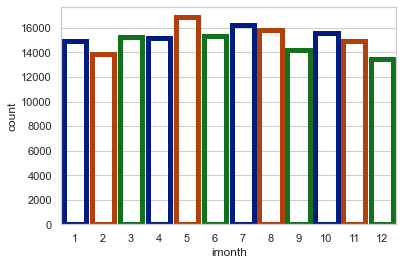

In [323]:
cplot('imonth')

In [324]:
unique('iday')

Number of unique vaure are 32 which are : 
 [2, 0, 1, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 4, 7, 16, 17, 18, 23, 24, 5, 29]


In [325]:
remove_zero('iday')

In [326]:
data.shape[0]

180800

In [327]:
unique('extended')

Number of unique vaure are 2 which are : 
 [0, 1]


In [328]:
#it's fine

In [329]:
data['latitude'].isna().sum()

4469

In [330]:
#that's not many as compared to whole data let's convert it to 0 and delete it.

In [331]:
fillna('latitude',0)
remove_zero('latitude')

In [332]:
data.shape

(176331, 39)

In [333]:
fillna('longitude',0)
remove_zero('longitude')
data['longitude'].isna().sum()

0

In [334]:
#did same with longitude

In [335]:
data['specificity'].isna().sum()

0

In [336]:
data['vicinity'].isna().sum()

0

In [337]:
data['doubtterr'].isna().sum()

1

In [338]:
unique('doubtterr')

Number of unique vaure are 4 which are : 
 [0.0, 1.0, -9.0, nan]


In [339]:
#let's convert nan to another number and drop it

In [340]:
fillna('doubtterr',55)
remove_zero('doubtterr',55)
data['doubtterr'].isna().sum()

0

In [341]:
data['multiple'].isna().sum()

1

In [342]:
unique('multiple')

Number of unique vaure are 3 which are : 
 [0.0, 1.0, nan]


In [343]:
fillna('multiple',55)
remove_zero('multiple',55)
data['multiple'].isna().sum()

0

In [344]:
data['guncertain1'].isna().sum()

371

In [345]:
unique('guncertain1')

Number of unique vaure are 3 which are : 
 [0.0, 1.0, nan]


In [346]:
fillna('guncertain1',55)
remove_zero('guncertain1',55)
data['guncertain1'].isna().sum()

0

In [347]:
data['nkill'].isna().sum()

9628

In [348]:
data['nkill']=data['nkill'].interpolate(method ='linear', limit_direction ='forward')


In [349]:
data['nkill'].isna().sum()

0

In [350]:
#so we can have a look to number of victims distribution

In [351]:
victims = max_counts('nkill',10, True)
victims

0.0           88241
1.0           36712
2.0           14186
3.0            7685
4.0            4926
5.0            3505
6.0            2525
7.0            1930
8.0            1473
10.0           1170
rest items    13604
dtype: int64

In [352]:
data['nwound'].isna().sum()

15495

In [353]:
#USING INTERPOLATION TO DEAL WITH NAN VALUES IN WOUND COLUMN

In [354]:
data['nwound']=data['nwound'].interpolate(method ='linear', limit_direction ='forward')

In [355]:
data['nwound'].isna().sum()

0

In [356]:
wounded = max_counts('nwound',10, True)
wounded

0.0           106334
1.0            16552
2.0            10576
3.0             7517
4.0             5017
5.0             3917
6.0             2945
7.0             2466
8.0             1852
10.0            1429
rest items     17352
dtype: int64

In [357]:
data['ishostkid'].isna().sum()

175

In [358]:
#HERE USING MEAN VALUE TO FILL NAN 

In [359]:
data['ishostkid'] = data['ishostkid'].fillna(data['ishostkid'].mean())
data['ishostkid'].isna().sum()

0

In [360]:
#WE FINALLY DEALT WITH NUMERICAL COLUMNS 

In [361]:
#Now for categorical columns

In [362]:
count_nulls()

Column provstate has been number of nulls 405
Column city has been number of nulls 423
Column targsubtype1_txt has been number of nulls 10062
Column corp1 has been number of nulls 40342
Column target1 has been number of nulls 572
Column natlty1_txt has been number of nulls 1498
Column weapsubtype1_txt has been number of nulls 19425


In [363]:
#HERE WE CHANGE NAN VALUE TO OTHERS BECAUSE WE CAN'T USE OTHER METHOD OF MISSING VALUES SO HERE WE ARE JUST CONVERTING TO OTHERS,
#BECAUSE IT IS POSSIBLE.

In [364]:
fillna('provstate','other')
fillna('city','other')
fillna('targsubtype1_txt','other')
fillna('corp1','other')
fillna('target1','other')
fillna('natlty1_txt','other')
fillna('weapsubtype1_txt','other')

In [365]:
#Visualization

In [366]:
#SOME BASIC OUTCOMES AND ANALYSIS OF OUR DATA

In [367]:
print("Country with the most attacks:",data['country_txt'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data['region_txt'].value_counts().idxmax())
print("Year with the most attacks:",data['iyear'].value_counts().idxmax())
print("Month with the most attacks:",data['imonth'].value_counts().idxmax())
print("Group with the most attacks:",data['gname'].value_counts().index[1])
print("Most Attack Types:",data['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Unknown
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [368]:
#LETS SEE THE TOP AFFECTED COUNTRIES, WITH MOST ATTACKS

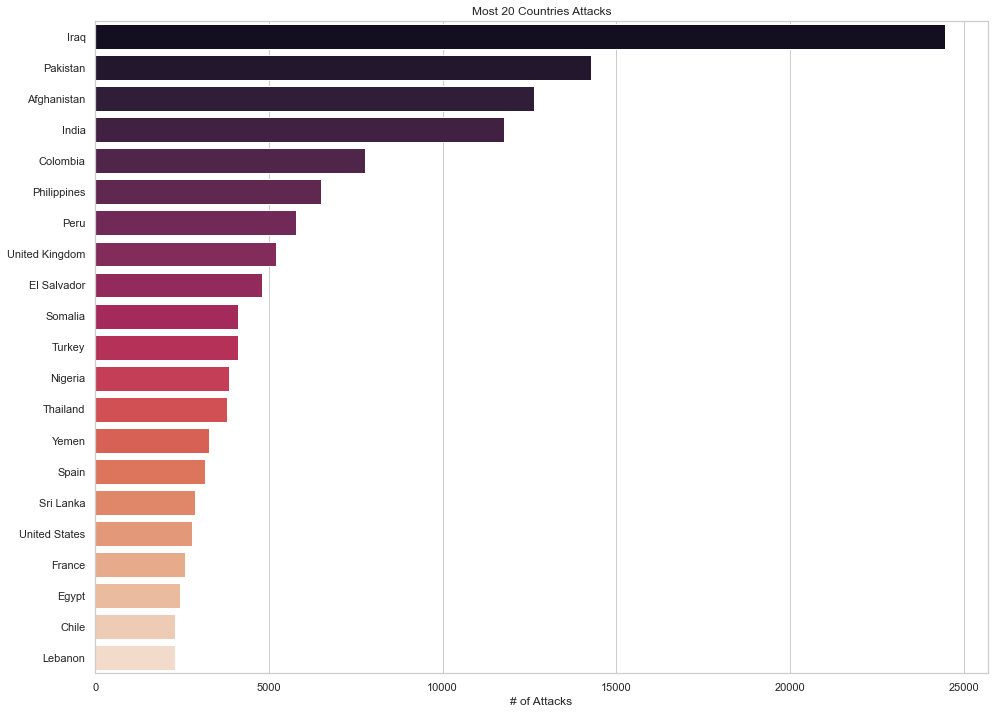

In [369]:
mostGlob = data.country_txt.value_counts()[:21]
plt.figure(figsize=(16,12))
ax = sns.barplot(x=mostGlob,y=mostGlob.index,palette="rocket")
plt.title("Most 20 Countries Attacks")
plt.xlabel("# of Attacks")
plt.show()

In [370]:
#HERE WE CAN SEE IRAQ PAKISTAN AND AFGHANISTAN ARE TOP COUNTRIES AFFECTED BY TERRORISM

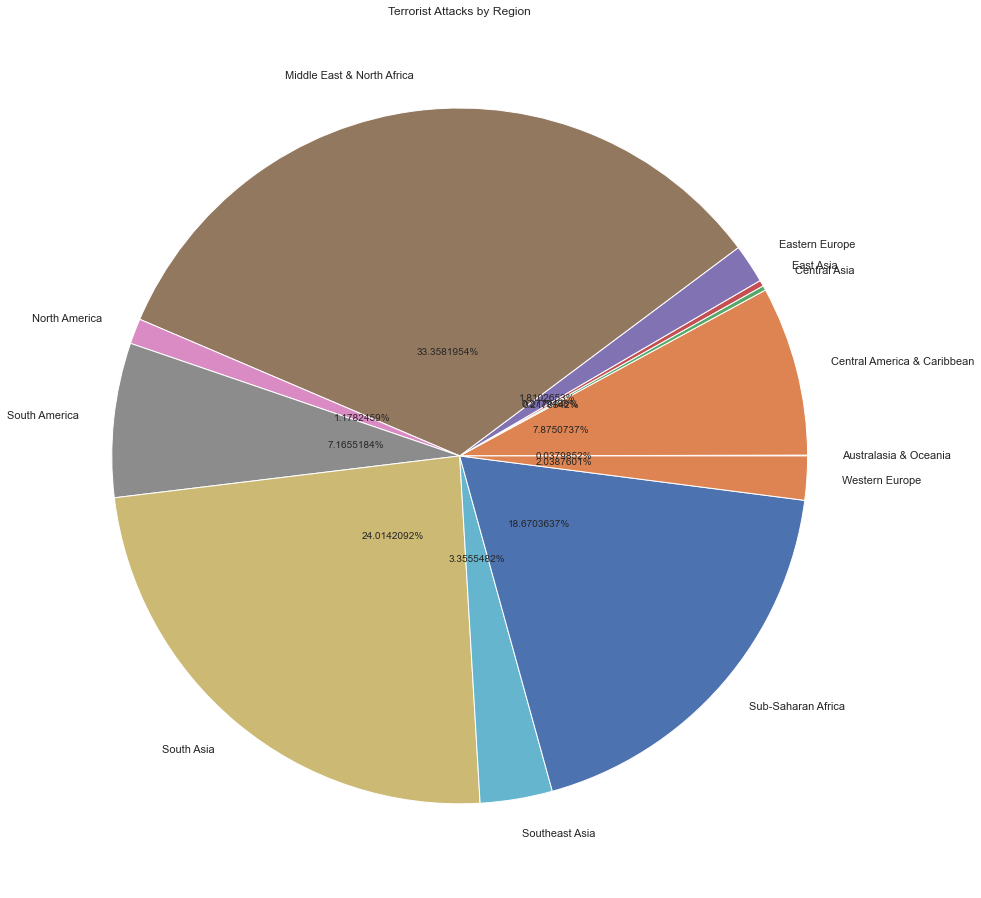

In [371]:
dataRegion = data.groupby('region_txt').sum()
labels = dataRegion.index
explode = [0,0,0,0,0,0,0,0,0,0,0,0]
size = dataRegion["nkill"].values

plt.figure(figsize=(16,16))
plt.pie(size,explode=explode,labels=labels,autopct="%0.7f%%",pctdistance=0.3)
plt.title("Terrorist Attacks by Region")
plt.show()

In [372]:
#HERE WE SEE ATTACKS BY REGION, MIDDLE EAST AND ASIA IS ON TOP

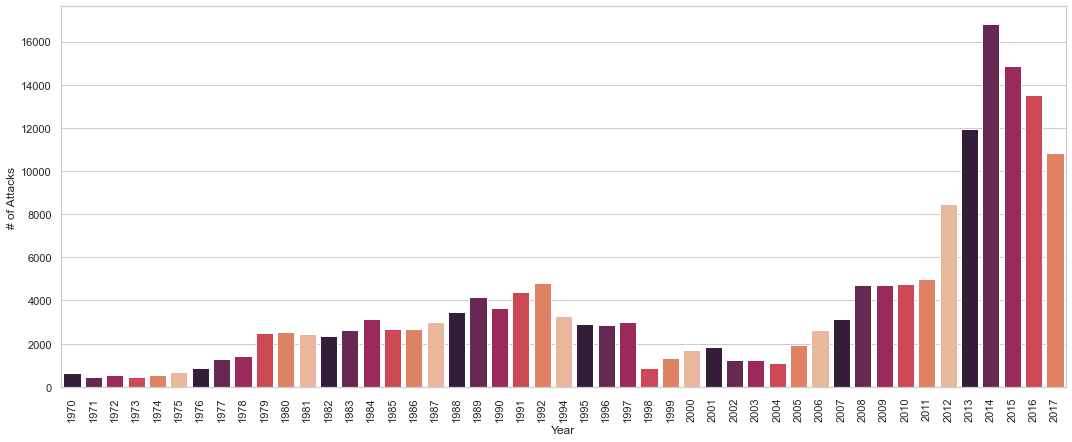

In [373]:
dataYear = list(zip(data.iyear.value_counts().index,data.iyear.value_counts().values))
dataYear = sorted(dataYear)
terrorByYear = []
terrorByCounts = []
for i in dataYear:
    terrorByYear.append(i[0])
    terrorByCounts.append(i[1])

plt.figure(figsize=(18,7))
sns.barplot(x=terrorByYear,y=terrorByCounts,palette=sns.color_palette("rocket"))
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("# of Attacks")
plt.show()


In [374]:
#HERE WE CAN SEE THE NUMBER OF ATTACKS ARE INCREASING EVERY YEAR.

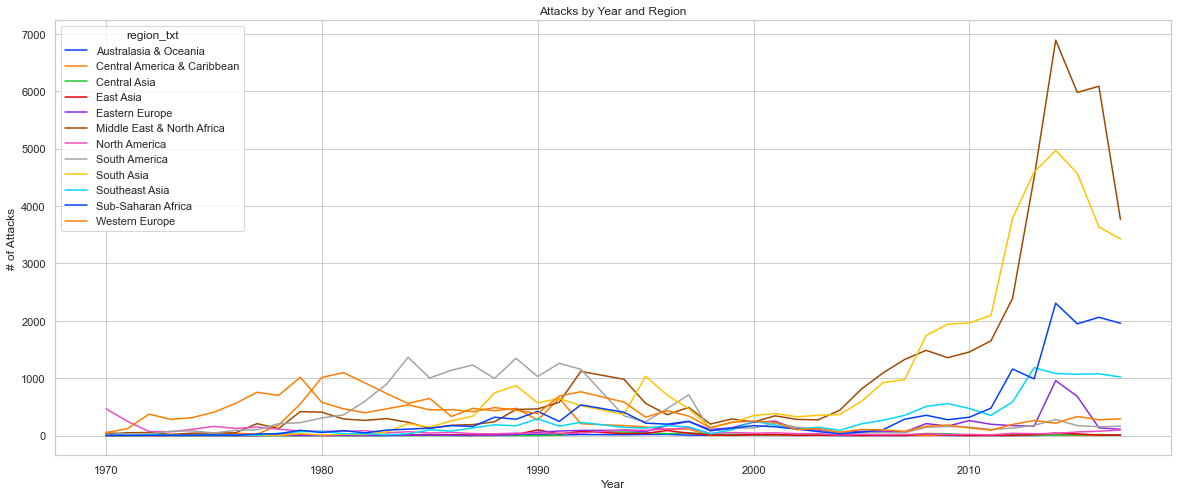

In [375]:
regionYear = pd.crosstab(data.iyear,data.region_txt)
regionYear.plot(color=sns.color_palette("bright",12),grid=True)
figure=plt.gcf()
figure.set_size_inches(20,8)
plt.xlabel("Year")
plt.ylabel("# of Attacks")
plt.title("Attacks by Year and Region")
plt.show()

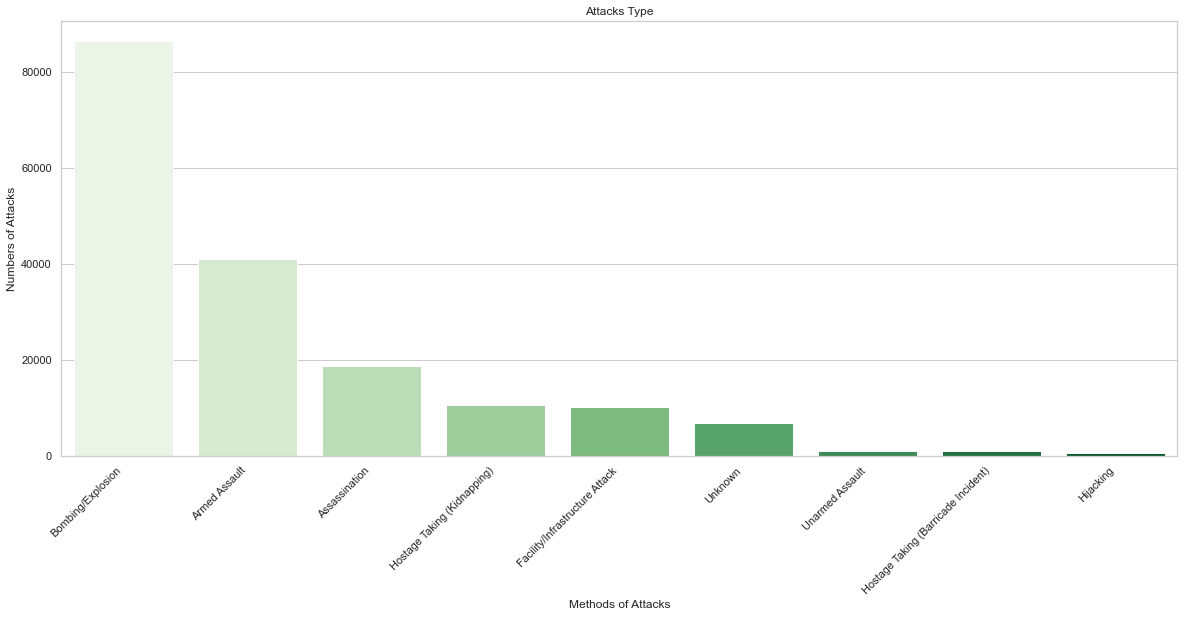

In [376]:
plt.figure(figsize=(20,8))
sns.barplot(x=data.attacktype1_txt.value_counts().index,y=data.attacktype1_txt.value_counts().values,palette="Greens")
plt.xlabel("Methods of Attacks")
plt.ylabel("Numbers of Attacks")
plt.xticks(rotation=45, ha="right")
plt.title("Attacks Type")
plt.show()

HERE WE SE THE TYPES OF ATTACKS BOMBING AND EXPLOSION ARE MORE COMMON AND ALMOST DOUBLE AMONG OTHERS. 
ALMOST 65% ATTACKS ARE BOMBING ATTACKS.

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hifza\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probability density distribution of total count of terrorist attacks from 454 to 16793')

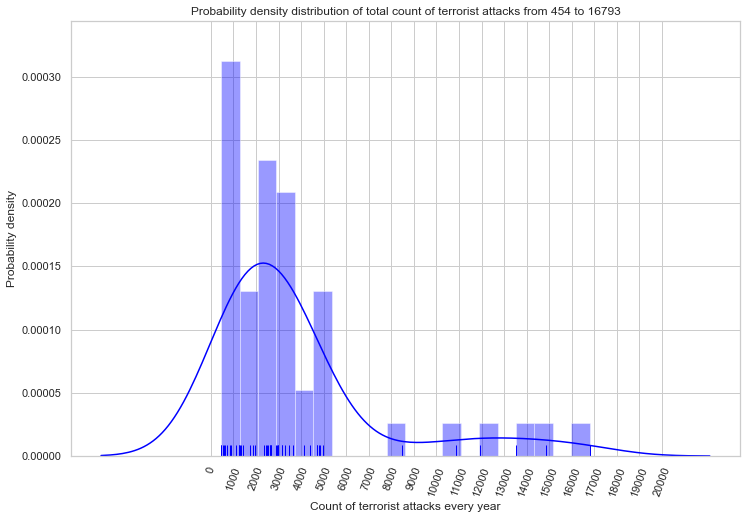

In [378]:
from matplotlib.ticker import FuncFormatter,ScalarFormatter
year_group = data.groupby('iyear',as_index = False)['iyear'].count()
plt.figure(figsize=(12,8))
ax=sns.distplot(year_group['iyear'], 
             bins=20, color='blue',rug= True)
plt.xlabel('Count of terrorist attacks every year')
plt.ylabel('Probability density')
plt.xticks(range(0,20001,1000),rotation =70)
#ax.xaxis.set_major_formatter(formatter)
plt.title('Probability density distribution of total count of terrorist attacks from {0} to {1}'.format(year_group['iyear'].min(),
                                                                                             year_group['iyear'].max()))

In [379]:
#plots of deaths per year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1995'),
  Text(25, 0, '1996'),
  Text(26, 0, '1997'),
  Text(27, 0, '1998'),
  Text(28, 0, '1999'),
  Text(29, 0, '2000'),
  Text(30, 0, '2001'),
  Text(31, 0, '2002'),
  Text(32, 0, '2003'),
  Text(33, 0, '2004'),
  Text(34, 0, 

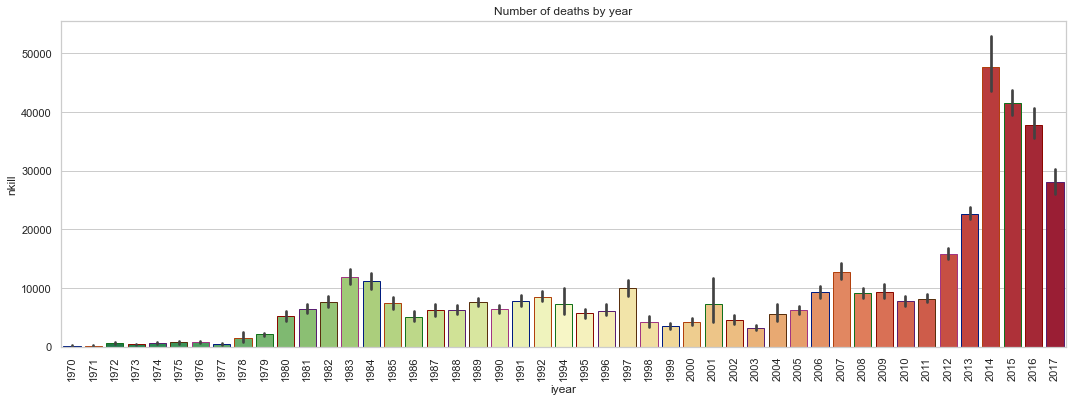

In [380]:
plt.subplots(figsize=(18,6))
ax = sns.barplot(x="iyear", y="nkill", data=data, estimator = sum, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7)).set_title('Number of deaths by year')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Types of Weapons')

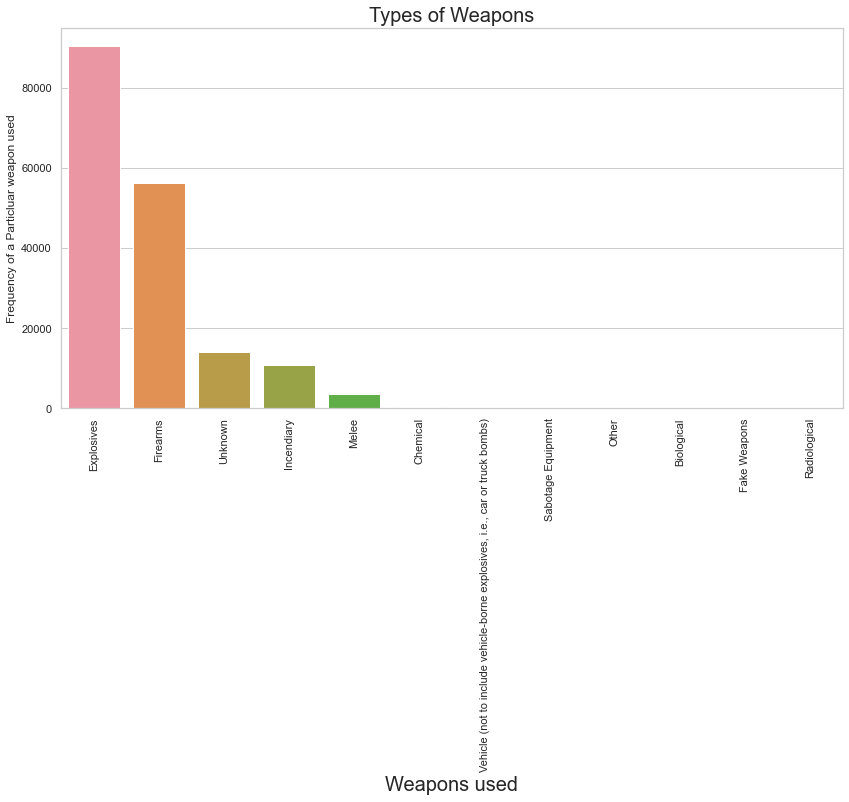

In [382]:

# barplot of waepons used
plt.figure(figsize=(14,7))
sns.barplot(x= data["weaptype1_txt"].value_counts()[:50].index,y = data["weaptype1_txt"].value_counts()[:50].values)
plt.xlabel("Weapons used", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Frequency of a Particluar weapon used", fontsize=12)
plt.title("Types of Weapons", fontsize=20)

In [383]:
#THE MOST COMMON TECHNIQUE AND WEAPON IS EXPLOSIVE BOMB

In [384]:
from pandas import DataFrame


weapons = data['weaptype1_txt'].value_counts()
weapons = DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon used', 'Weapon Count']
weapons

,Weapon used,Weapon Count
0,Explosives,90468
1,Firearms,56309
2,Unknown,14064
3,Incendiary,10862
4,Melee,3516
5,Chemical,291
6,Vehicle (not to include vehicle-borne explosiv...,135
7,Sabotage Equipment,127
8,Other,110
9,Biological,31


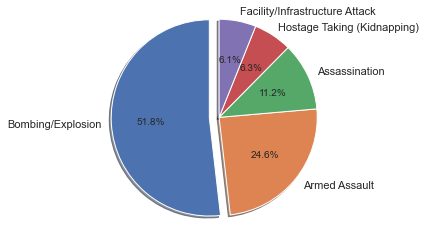

In [385]:
label1=data['attacktype1_txt'].value_counts()[:5].index
size=data['attacktype1_txt'].value_counts()[:5].values
explode = (0.1, 0, 0, 0,0) 
fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=label1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


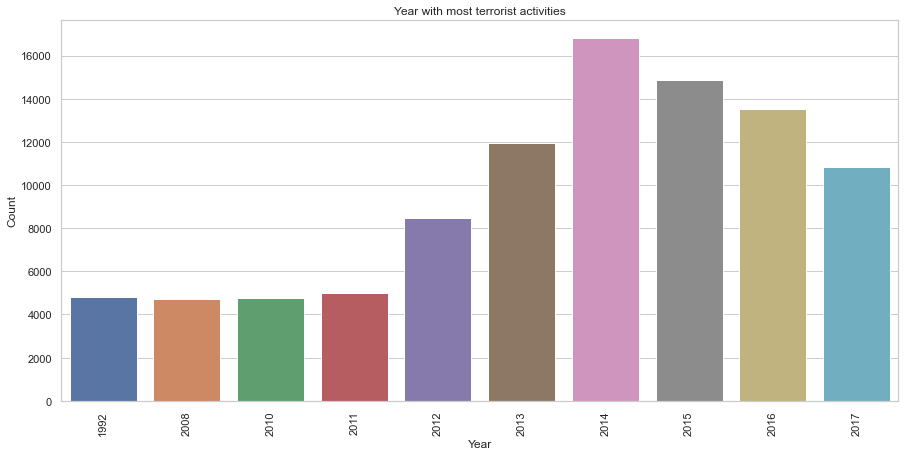

In [386]:
# Visualzing the  Top 10 years with maximum attacks
plt.figure(figsize = (15,7))
sns.barplot(data['iyear'].value_counts()[:10].index,data['iyear'].value_counts()[:10].values)
plt.title('Year with most terrorist activities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [387]:
#THE TOP 10 YEARS ARE, STARTING WITH 1992 THEN ATTACKS AND GOT NORMAL THEN IT INCREASES IN 2008 AND CONTINUE TO 
#RISE AND INCRESES EVERY YEAR.

In [388]:
#lets talk about suicide attacks

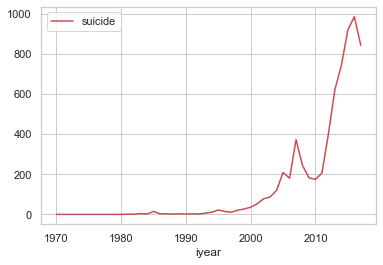

In [389]:
#suicide attacks, both success's and fails
suicides_by_year = data[["iyear","suicide"]].groupby("iyear").aggregate(np.sum)
suicides_by_year.plot(color = 'r');

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


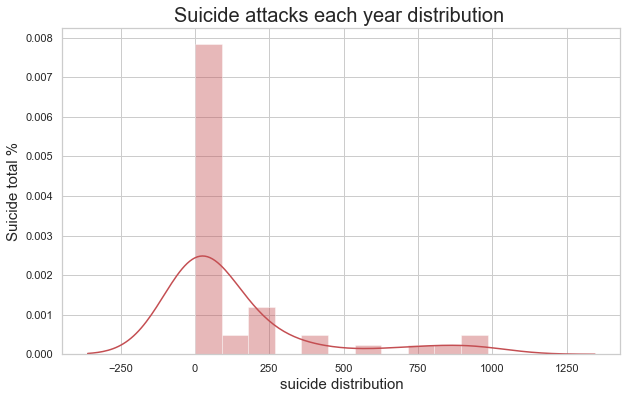

In [390]:
plt.figure(figsize=(10,6))
fig = sns.distplot(data[["iyear","suicide"]].groupby("iyear").aggregate(np.sum), color = 'r')
fig.set_xlabel("suicide distribution",size=15)
fig.set_ylabel("Suicide total %",size=15)
plt.title('Suicide attacks each year distribution ',size = 20)
plt.show()

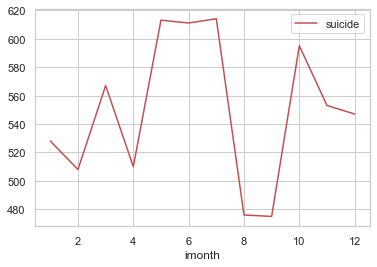

In [391]:
#monthly
#suicide attacks, both success's and fails
suicides_by_month = data[["imonth","suicide"]].groupby("imonth").aggregate(np.sum)
suicides_by_month.plot(color = 'r');

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


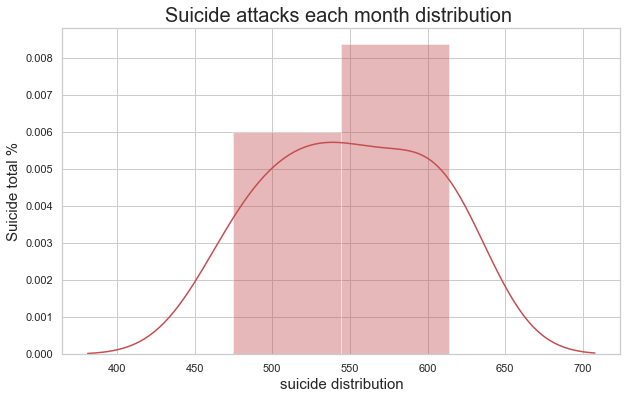

In [392]:
plt.figure(figsize=(10,6))
fig = sns.distplot(data[["imonth","suicide"]].groupby("imonth").aggregate(np.sum), color = 'r')
fig.set_xlabel("suicide distribution",size=15)
fig.set_ylabel("Suicide total %",size=15)
plt.title('Suicide attacks each month distribution ',size = 20)
plt.show()

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


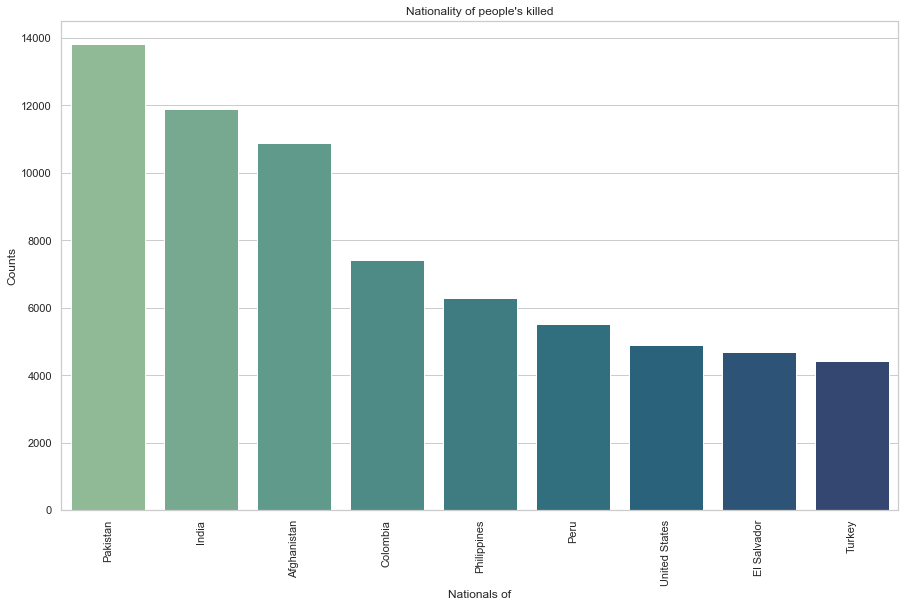

In [393]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data["natlty1_txt"].value_counts()[1:10].index,
    data["natlty1_txt"].value_counts()[1:10].values,
    palette=("crest"),
)
plt.title("Nationality of people's killed")
plt.xlabel("Nationals of")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show();

HERE WE SEE THE NATIONALITY OF PEOPLE DIED IN ATTACKS, MOSTLY ARE PAKISTANIS.

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


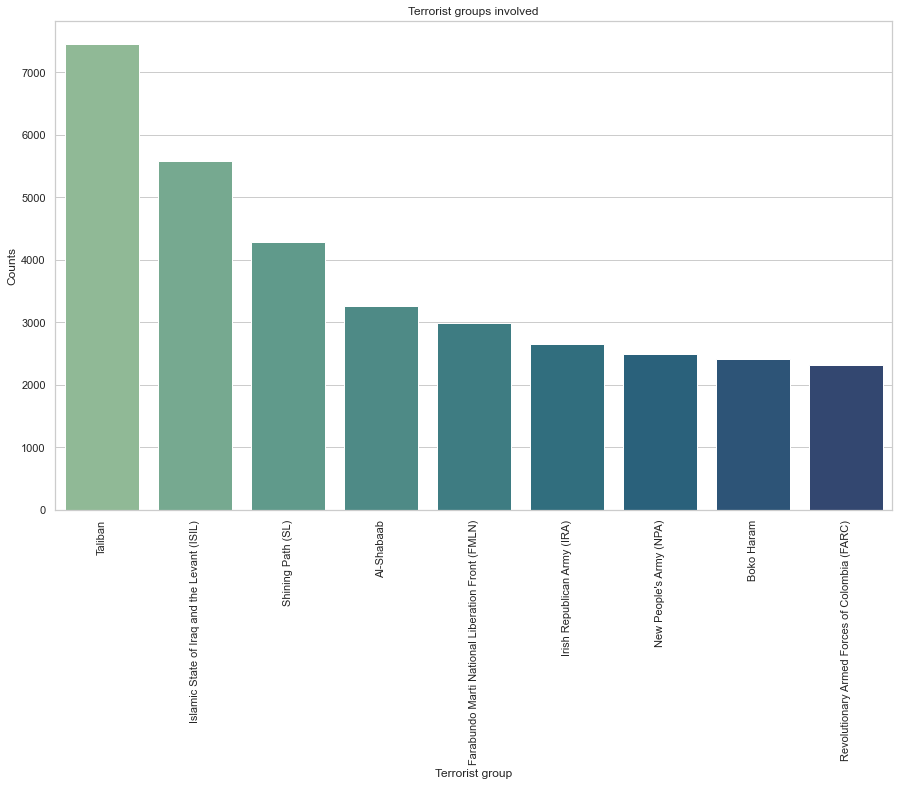

In [395]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data["gname"].value_counts()[1:10].index,
    data["gname"].value_counts()[1:10].values,
    palette=("crest"),
)
plt.title("Terrorist groups involved")
plt.xlabel("Terrorist group")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show();

C:\Users\hifza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


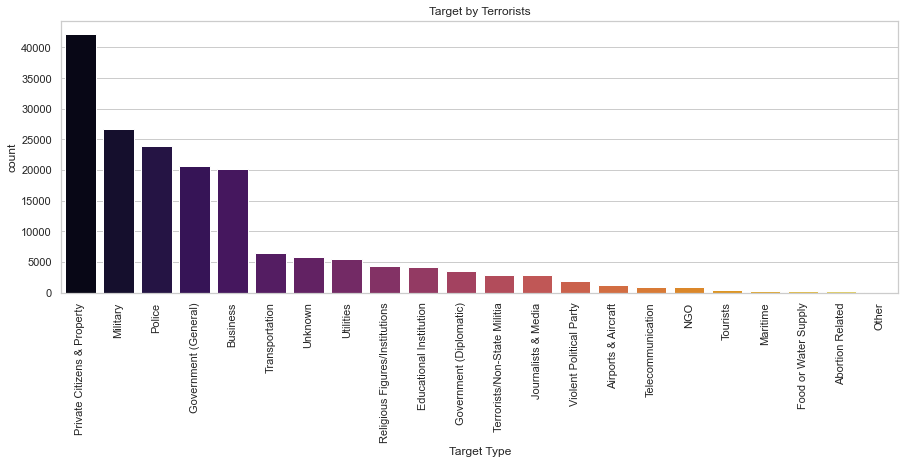

In [396]:
plt.subplots(figsize=(15,5))
sns.countplot('targtype1_txt',data=data,palette='inferno',order=data['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()

In [397]:
encoder('provstate','provstate_code',True)
encoder('city','city_code',True)
encoder('targsubtype1_txt','targsubtype_code',True)
encoder('corp1','corp_code',True)
encoder('target1','target_code',True)
encoder('natlty1_txt','natlty_code',True)
encoder('weapsubtype1_txt','weapsubtype_code',True)

encoder('country_txt','country_code',True)    
encoder('region_txt','region_code',True)    
encoder('attacktype1_txt','attacktype_code',True)    
encoder('targtype1_txt','targtype_code',True)    
encoder('gname','groupname',True)    
encoder('weaptype1_txt','weaptype_code',True)    
encoder('dbsource','dbsource_code',True)  

In [398]:
#now checking corelation and t_tests for each column 

In [399]:
from scipy.stats import pearsonr
#Lets check its correlation with LOS
# calculate Pearson's correlation
corr, _ = pearsonr(data['iyear'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.080


In [400]:
p_value=stats.ttest_ind(a=data['iyear'],b=data['success'],equal_var=False)
p_value


Ttest_indResult(statistic=63623.20674070246, pvalue=0.0)

In [401]:
corr, _ = pearsonr(data['imonth'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.002


In [402]:
p_value=stats.ttest_ind(a=data['imonth'],b=data['success'],equal_var=False)
p_value


Ttest_indResult(statistic=688.0675657068862, pvalue=0.0)

In [403]:
corr, _ = pearsonr(data['iday'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.011


In [404]:
p_value=stats.ttest_ind(a=data['iday'],b=data['success'],equal_var=False)
p_value


Ttest_indResult(statistic=703.0021325849654, pvalue=0.0)

In [405]:
corr, _ = pearsonr(data['extended'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.073


In [406]:
p_value=stats.ttest_ind(a=data['extended'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-939.1176275363822, pvalue=0.0)

In [407]:
corr, _ = pearsonr(data['latitude'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.074


In [408]:
p_value=stats.ttest_ind(a=data['latitude'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=510.29154283047814, pvalue=0.0)

In [409]:
corr, _ = pearsonr(data['longitude'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.001


In [410]:
p_value=stats.ttest_ind(a=data['longitude'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-0.944623796063487, pvalue=0.3448522710219938)

In [411]:
corr, _ = pearsonr(data['specificity'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.003


In [412]:
p_value=stats.ttest_ind(a=data['specificity'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=223.80484229288206, pvalue=0.0)

In [413]:
corr, _ = pearsonr(data['vicinity'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.002


In [414]:
p_value=stats.ttest_ind(a=data['vicinity'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-811.6524608358772, pvalue=0.0)

In [415]:
corr, _ = pearsonr(data['crit1'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.011


In [416]:
p_value=stats.ttest_ind(a=data['crit1'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=126.59534221376923, pvalue=0.0)

In [417]:
corr, _ = pearsonr(data['crit2'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.014


In [418]:
p_value=stats.ttest_ind(a=data['crit2'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=135.22123619909505, pvalue=0.0)

In [419]:
corr, _ = pearsonr(data['crit3'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.011


In [420]:
p_value=stats.ttest_ind(a=data['crit3'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-9.127723791237567, pvalue=7.030910430782199e-20)

In [421]:
corr, _ = pearsonr(data['doubtterr'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.028


In [422]:
p_value=stats.ttest_ind(a=data['doubtterr'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-239.4681445728924, pvalue=0.0)

In [423]:
corr, _ = pearsonr(data['multiple'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.020


In [424]:
p_value=stats.ttest_ind(a=data['multiple'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-672.7370550344948, pvalue=0.0)

In [425]:
corr, _ = pearsonr(data['suicide'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.030


In [426]:
p_value=stats.ttest_ind(a=data['suicide'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-968.9573835493089, pvalue=0.0)

In [427]:
corr, _ = pearsonr(data['guncertain1'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.026


In [428]:
p_value=stats.ttest_ind(a=data['guncertain1'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-808.0813299329311, pvalue=0.0)

In [429]:
corr, _ = pearsonr(data['individual'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.014


In [430]:
p_value=stats.ttest_ind(a=data['individual'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-1159.7836910992814, pvalue=0.0)

In [431]:
corr, _ = pearsonr(data['nkill'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.051


In [432]:
p_value=stats.ttest_ind(a=data['nkill'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=55.92319133210714, pvalue=0.0)

In [433]:
corr, _ = pearsonr(data['nwound'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.025


In [434]:
p_value=stats.ttest_ind(a=data['nwound'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=27.510150415121753, pvalue=2.994395776244287e-166)

In [435]:
corr, _ = pearsonr(data['property'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.039


In [436]:
p_value=stats.ttest_ind(a=data['property'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-192.96509568548382, pvalue=0.0)

In [437]:
corr, _ = pearsonr(data['ishostkid'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.044


In [438]:
p_value=stats.ttest_ind(a=data['ishostkid'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-625.4470764067088, pvalue=0.0)

In [439]:
corr, _ = pearsonr(data['INT_LOG'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.058


In [440]:
p_value=stats.ttest_ind(a=data['INT_LOG'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-504.8433888706172, pvalue=0.0)

In [441]:
corr, _ = pearsonr(data['INT_IDEO'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.057


In [442]:
p_value=stats.ttest_ind(a=data['INT_IDEO'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-487.26548894642804, pvalue=0.0)

In [443]:
corr, _ = pearsonr(data['INT_MISC'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.014


In [444]:
p_value=stats.ttest_ind(a=data['INT_MISC'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-521.3028898360168, pvalue=0.0)

In [445]:
corr, _ = pearsonr(data['INT_ANY'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.036


In [446]:
p_value=stats.ttest_ind(a=data['INT_ANY'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=-434.9788264923485, pvalue=0.0)

In [447]:
corr, _ = pearsonr(data['provstate_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.007


In [448]:
p_value=stats.ttest_ind(a=data['provstate_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=616.411662099941, pvalue=0.0)

In [449]:
corr, _ = pearsonr(data['city_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.006


In [450]:
p_value=stats.ttest_ind(a=data['city_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=693.1447450450711, pvalue=0.0)

In [451]:
corr, _ = pearsonr(data['targsubtype_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.054


In [452]:
p_value=stats.ttest_ind(a=data['targsubtype_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=832.6804039650257, pvalue=0.0)

In [453]:
corr, _ = pearsonr(data['corp_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.001


In [454]:
p_value=stats.ttest_ind(a=data['corp_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=883.4359496070657, pvalue=0.0)

In [455]:
corr, _ = pearsonr(data['target_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.073


In [456]:
p_value=stats.ttest_ind(a=data['target_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=761.5834422914902, pvalue=0.0)

In [457]:
corr, _ = pearsonr(data['natlty_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.025


In [458]:
p_value=stats.ttest_ind(a=data['natlty_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=754.7630442423533, pvalue=0.0)

In [459]:
corr, _ = pearsonr(data['weapsubtype_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.030


In [460]:
p_value=stats.ttest_ind(a=data['weapsubtype_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=814.6190215281798, pvalue=0.0)

In [461]:
corr, _ = pearsonr(data['country_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.021


In [462]:
p_value=stats.ttest_ind(a=data['country_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=735.4987172028124, pvalue=0.0)

In [463]:
corr, _ = pearsonr(data['region_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.024


In [464]:
p_value=stats.ttest_ind(a=data['region_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=1010.2560539255854, pvalue=0.0)

In [465]:
corr, _ = pearsonr(data['attacktype_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.003


In [466]:
p_value=stats.ttest_ind(a=data['attacktype_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=243.06908470248246, pvalue=0.0)

In [467]:
corr, _ = pearsonr(data['targtype_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.070


In [468]:
p_value=stats.ttest_ind(a=data['targtype_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=784.6281245142013, pvalue=0.0)

In [469]:
corr, _ = pearsonr(data['groupname'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.045


In [470]:
p_value=stats.ttest_ind(a=data['groupname'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=1002.4754077377008, pvalue=0.0)

In [471]:
corr, _ = pearsonr(data['weaptype_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.038


In [472]:
p_value=stats.ttest_ind(a=data['weaptype_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=497.93334743650485, pvalue=0.0)

In [473]:
corr, _ = pearsonr(data['dbsource_code'], data['success'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.059


In [474]:
p_value=stats.ttest_ind(a=data['dbsource_code'],b=data['success'],equal_var=False)
p_value

Ttest_indResult(statistic=1488.6733672978914, pvalue=0.0)

In [ ]:
#Removing columns that are not effecting my label much and I think these won't be helpful.

In [475]:

remove_cols = [
    "specificity",
    "vicinity",
    "crit1",
    "crit2",
    "crit3",
    "doubtterr",
    "multiple",
    "guncertain1",
    "individual",
    "ishostkid",
    "INT_LOG",
    "INT_IDEO",
    "INT_MISC",
    "INT_ANY",
]
data = data.drop(remove_cols, axis=1)
data.head()

,iyear,imonth,iday,extended,latitude,longitude,success,suicide,nkill,nwound,...,target_code,natlty_code,weapsubtype_code,country_code,region_code,attacktype_code,targtype_code,groupname,weaptype_code,dbsource_code
0,1970,7,2,0,18.456792,-69.951164,1,0,1.0,0.0,...,38800,50,30,46,1,1,13,1859,10,13
5,1970,1,1,0,37.005105,-89.176269,1,0,0.0,0.0,...,14917,198,27,188,6,0,12,665,4,8
6,1970,1,2,0,-34.891151,-56.187214,0,0,0.0,0.0,...,38600,199,1,189,7,1,12,3197,4,13
7,1970,1,2,0,37.791927,-122.225906,1,0,0.0,0.0,...,25392,198,26,188,6,2,20,3319,2,8
8,1970,1,2,0,43.076592,-89.412488,1,0,0.0,0.0,...,55057,198,12,188,6,3,9,2214,5,8


We can group tha data based of different meaures. In the example below, 
I have used "attack_method" to group the data and print the first observation

In [476]:
data.groupby("attacktype_code").first()

,iyear,imonth,iday,extended,latitude,longitude,success,suicide,nkill,nwound,...,corp_code,target_code,natlty_code,weapsubtype_code,country_code,region_code,targtype_code,groupname,weaptype_code,dbsource_code
attacktype_code,,,,,,,,,,,,,,,,,,,,,
0,1970,1,1,0,37.005105,-89.176269,1,0,0.0,0.0,...,5178,14917,198,27,188,6,12,665,4,8
1,1970,7,2,0,18.456792,-69.951164,1,0,1.0,0.0,...,32120,38800,50,30,46,1,13,1859,10,13
2,1970,1,2,0,37.791927,-122.225906,1,0,0.0,0.0,...,21713,25392,198,26,188,6,20,3319,2,8
3,1970,1,2,0,43.076592,-89.412488,1,0,0.0,0.0,...,23844,55057,198,12,188,6,9,2214,5,8
4,1970,1,8,0,41.890961,12.490069,1,0,0.0,0.0,...,28885,28165,198,20,86,11,1,3319,4,9
5,1970,6,9,1,31.950001,35.933331,1,0,0.0,0.0,...,32120,33610,126,1,90,5,2,2457,4,13
6,1970,1,22,0,10.482834,-66.962128,1,0,0.0,0.0,...,9206,40621,203,30,193,7,2,447,10,13
7,1970,5,22,0,40.697132,-73.931351,1,0,0.0,3.0,...,22075,538,206,2,188,6,16,1585,6,7
8,1970,1,31,0,15.675051,120.331618,0,0,0.0,1.0,...,29468,59665,198,30,139,9,9,2209,10,13


In [477]:
data["natlty_code"].value_counts()[:15]

86     23986
141    13815
82     11902
0      10878
36      7420
147     6294
146     5526
198     4911
54      4702
191     4421
88      3943
187     3755
135     3739
138     3362
168     3133
Name: natlty_code, dtype: int64

In [478]:
data['attacktype_code'].value_counts()

2    86313
0    40895
1    18693
6    10548
3    10104
8     6843
7      978
5      957
4      626
Name: attacktype_code, dtype: int64

In [479]:
#making a model for predictions and training

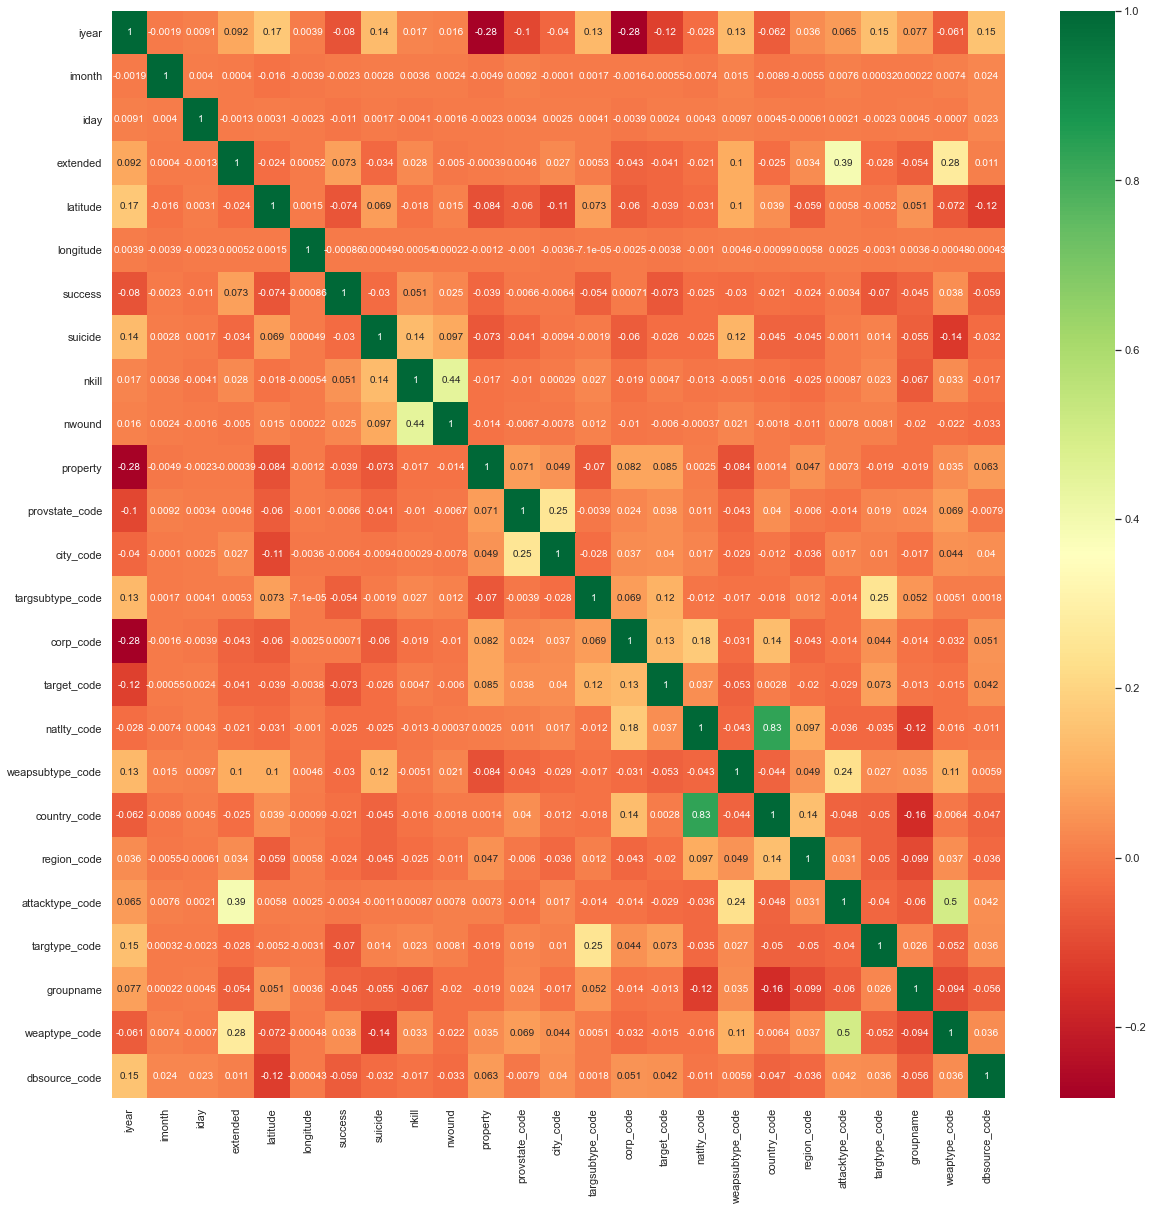

In [480]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

HERE I CAN SEE MOST OF THE FEATURES ARE NOT HIGHLY CORELATED 

# FIRST WE GO WITH MODELING AND PREDICTING GROUPS.

In [481]:
#Here we are starting with group involved in the attacks 

In [482]:
#variables that have correlation with groups name


In [483]:
cor_target = abs(corrmat["groupname"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.08]
relevant_features

natlty_code      0.124140
country_code     0.164321
region_code      0.099122
groupname        1.000000
weaptype_code    0.093776
Name: groupname, dtype: float64

In [484]:
data['groupname'].isnull().sum()


0

In [485]:
X , y = make_xy('groupname')

In [486]:
#using class imbalancing

In [487]:
class_count = data['groupname'].value_counts()
keep_class = []
for i, v in class_count.items():
    if (v > 500):
        keep_class.append(i)
frame = pd.DataFrame(columns=data.columns)
for i in keep_class:
    frame = frame.append(data[data.groupname == i])

y = frame['groupname']
y=y.astype('int')
X = frame.drop(['groupname'], axis=1)

NOW WE ARE USING FEATURE SELECTION TO SELECT THE TOP 15 FEATURES

In [488]:
from sklearn.feature_selection import f_classif
f = f_classif(X, y)

class_f = dict(zip(X.columns, f[0]))
sorted_idx_class_f = sorted(class_f, key=(lambda key: class_f[key]), reverse=True)

#Taking top 15 features contributing
j = 15
X = X[sorted_idx_class_f[0:j]]

MY TOP SELECTED FEATURES ARE STORED IN X

In [489]:
X

,longitude,latitude,country_code,region_code,iyear,natlty_code,corp_code,weapsubtype_code,dbsource_code,suicide,provstate_code,property,attacktype_code,weaptype_code,nkill
7,-122.225906,37.791927,188,6,1970,198,21713,26,8,0,434,1,2,2,0.0
12,12.490069,41.890961,86,11,1970,198,28885,20,9,0,1358,0,4,4,0.0
25,-90.529068,14.622869,70,1,1970,68,4794,30,13,0,888,0,1,10,1.0
26,121.057495,14.674280,139,9,1970,198,32120,29,13,0,1573,1,2,2,0.0
34,13.401851,52.501530,47,4,1970,66,32120,12,13,0,310,1,3,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181062,12.030083,9.462209,129,10,2017,135,25601,27,14,0,22,1,0,4,1.0
181158,7.512218,7.860742,129,10,2017,135,21432,1,14,0,1252,1,0,4,10.0
181159,5.633592,8.215909,129,10,2017,135,31084,1,14,0,1252,1,0,4,0.0
181464,8.333605,9.428792,129,10,2017,135,1211,27,14,0,1110,-9,0,4,4.0


In [490]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [491]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [200]:
#using model Random forest Classifier as my model

In [492]:
def model_evalueation(y_test, y_pred):
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    f1score = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    cf = confusion_matrix(y_true=y_test, y_pred=y_pred)
    return {"accuracy": accuracy, "f1_score": f1score, "confusion_matrix":cf}


In [493]:
def checkpred(X_test):
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)
    print('Predicted Value for GBCModel is : ' , y_pred[:10])
    print('Prediction Probabilities Value for GBCModel is : ' , y_pred_prob[:10])

In [203]:

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)
score = model_evalueation(y_test,y_pred)
print(score)


{'accuracy': 0.8534263498292275, 'f1_score': 0.7450085094518012, 'confusion_matrix': array([[  105,     0,     0, ...,     0,     0,    27],
       [    0,    79,     0, ...,     0,     0,    29],
       [    0,     0,    37, ...,     0,     0,   100],
       ...,
       [    0,     0,     0, ...,    76,     0,   170],
       [    0,     0,     0, ...,     0,    37,     7],
       [   18,    17,    23, ...,    39,    11, 14318]], dtype=int64)}


In [204]:
#checking prediction
checkpred(X_test)

Predicted Value for GBCModel is :  [3319 3319 3319  173 3319 3059 1497 3319 3319 3319]
Prediction Probabilities Value for GBCModel is :  [[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.38 0.   0.   0.62]
 [0.   0.   0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.9 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.77 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.23]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0

In [205]:
#here we can see the accuracy is good but not that good

In [206]:
#lets try gradient boosting algorithm

In [207]:
#Create a Gaussian Classifier
clf = GradientBoostingClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


y_pred=clf.predict(X_test)
score = model_evalueation(y_test,y_pred)
print(score)


{'accuracy': 0.8300632221495531, 'f1_score': 0.644705384116595, 'confusion_matrix': array([[   18,     0,     0, ...,     0,     0,   112],
       [    0,    21,     0, ...,     0,     0,    87],
       [    0,     0,    16, ...,     0,     0,   123],
       ...,
       [    0,     0,     0, ...,    35,     0,   210],
       [    0,     0,     0, ...,     0,    17,     1],
       [    2,    12,    10, ...,    13,     5, 14232]], dtype=int64)}


In [208]:
checkpred(X_test)

Predicted Value for GBCModel is :  [3319 3319 3319  173 3319 3059 1497 3319 3319 3319]
Prediction Probabilities Value for GBCModel is :  [[1.53313045e-07 3.09847522e-05 1.25803304e-04 1.10436139e-04
  1.35460536e-04 3.20547496e-05 1.19585231e-04 6.30311087e-05
  4.13321206e-05 1.95219635e-07 6.31198608e-05 2.61590199e-05
  2.51826433e-05 6.44498580e-05 5.97860355e-04 1.25361301e-04
  1.06524128e-04 7.32062656e-05 6.12270644e-05 1.08113250e-04
  1.43038803e-03 1.68026424e-04 1.32681107e-04 2.09846991e-06
  1.08817748e-04 3.68911838e-04 6.11474118e-04 1.51885869e-04
  3.99270730e-05 3.40655619e-01 2.93724535e-03 3.99359403e-05
  6.51442749e-01]
 [2.98748361e-07 9.38164111e-05 2.50219074e-04 3.07955790e-04
  3.56480774e-02 1.03791697e-04 5.64258495e-04 1.72255497e-04
  8.05502800e-05 3.80425530e-07 1.31545360e-04 2.28102029e-04
  2.20208784e-04 1.25588070e-04 9.91470494e-04 2.09592444e-04
  1.40966192e-04 2.02861328e-04 1.19308081e-04 3.21489662e-04
  1.34906357e-03 9.30570971e-04 2.58473

In [ ]:
#lets try one more XG boost algorithm

In [209]:
clf=XGBClassifier(random_state=1,learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
score = model_evalueation(y_test,y_pred)
print(score)



C:\Users\hifza\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:25:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': 0.8339510210013807, 'f1_score': 0.6603269455697099, 'confusion_matrix': array([[  112,     0,     0, ...,     0,     0,    20],
       [    0,    66,     0, ...,     0,     0,    42],
       [    0,     0,     0, ...,     0,     0,   139],
       ...,
       [    0,     0,     0, ...,    10,     0,   234],
       [    0,     0,     0, ...,     0,     7,     1],
       [   25,    10,     0, ...,     3,     1, 14355]], dtype=int64)}


In [210]:
checkpred(X_test)

Predicted Value for GBCModel is :  [3319 3319 3319  173 3319 3059 1497 3319 3319 3319]
Prediction Probabilities Value for GBCModel is :  [[0.01746489 0.01746485 0.01746556 0.01750521 0.01746545 0.0174648
  0.01746523 0.01746511 0.01746479 0.01746481 0.01746474 0.01746523
  0.01747429 0.01747568 0.01749117 0.0174831  0.01746909 0.01746944
  0.01746856 0.01749077 0.01892944 0.01746518 0.01746864 0.01746472
  0.01749145 0.01746516 0.01755399 0.01747714 0.01746943 0.16999255
  0.0177753  0.01746875 0.28653544]
 [0.01930407 0.01930402 0.01930481 0.01934864 0.05426645 0.01930397
  0.01932289 0.01930431 0.01930396 0.01930399 0.01930391 0.01936615
  0.01931324 0.01931599 0.01933311 0.0193242  0.01930871 0.0193091
  0.01930813 0.01933268 0.0194411  0.01930439 0.01930822 0.01930389
  0.01933342 0.01930437 0.01955529 0.01931761 0.01930909 0.01930498
  0.01932172 0.01930834 0.34660524]
 [0.01707472 0.01707467 0.01897978 0.01711414 0.01707526 0.01707462
  0.01707505 0.01707493 0.01707462 0.01707464

In [ ]:
#Here i'm using accurancy as my measure because my data is balanced and every class is important to me.

In [211]:
#by analyzing accuracy of all three algorithms lets go with Random forest classifier.

# NOW I AM USING SUCCESS AS MY LABEL CLASS, HERE WE SEE THE SUCCESS OF STRIKES.

In [494]:
X , y = make_xy('success')

In [495]:
X.shape

(175957, 24)

THERE ARE TOTAL OF 24 FEATURES IN X, I AM DOING RANDOM FOREST FEATURE SELECTION TO PICK THE TOP 10 FEATURES THAT GOES WELL WITH MY LABEL CLASS.

Feature: 0, Score: 0.05386
Feature: 1, Score: 0.02950
Feature: 2, Score: 0.03689
Feature: 3, Score: 0.00975
Feature: 4, Score: 0.04532
Feature: 5, Score: 0.04624
Feature: 6, Score: 0.00713
Feature: 7, Score: 0.09122
Feature: 8, Score: 0.06189
Feature: 9, Score: 0.11165
Feature: 10, Score: 0.03045
Feature: 11, Score: 0.03530
Feature: 12, Score: 0.06087
Feature: 13, Score: 0.03906
Feature: 14, Score: 0.05323
Feature: 15, Score: 0.02241
Feature: 16, Score: 0.03118
Feature: 17, Score: 0.02159
Feature: 18, Score: 0.01231
Feature: 19, Score: 0.08781
Feature: 20, Score: 0.04826
Feature: 21, Score: 0.02137
Feature: 22, Score: 0.02541
Feature: 23, Score: 0.01732


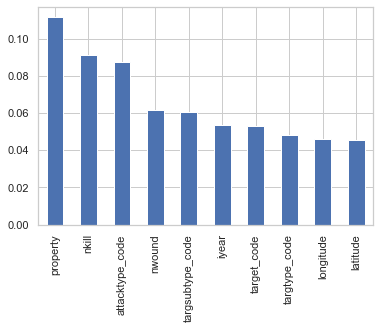

In [214]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()




LETS USE 1 ,MORE FEATURE SELECTION ALGORITHM THAT IS AMLOST SAME AS RANDOM FOREST, EXTRA TREE CLASSIFIER.

[0.05888855 0.04091336 0.04419626 0.00618269 0.04375497 0.04309106
 0.00466126 0.06579965 0.05070954 0.094936   0.03526129 0.03793861
 0.05884584 0.04641054 0.0602852  0.02694615 0.03607522 0.02688598
 0.02176194 0.0587003  0.06086947 0.02924133 0.03106226 0.01658254]


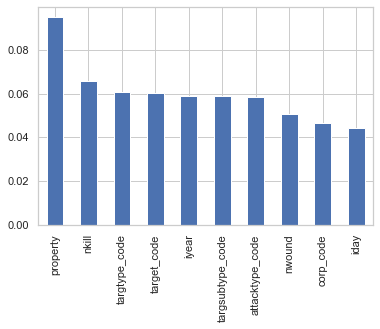

In [215]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()
list1=feat_importances.nlargest(10).keys().to_list()

NOW AFTER COMBINING AND ANALYZING RESULTS OF BOTH ALGORITHMS, OUR NEW FEATURES ARE:

In [216]:
X = X[['iyear','property','nkill', 'longitude','latitude', 'nwound', 'targsubtype_code',
       'attacktype_code','target_code',
       'targtype_code']]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [218]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [219]:
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
score = model_evalueation(y_test,y_pred)
print(score)


{'accuracy': 0.9531995908160946, 'f1_score': 0.8739085858510212, 'confusion_matrix': array([[ 2819,  1140],
       [  507, 30726]], dtype=int64)}


In [ ]:
#ACCURACY AND PREDICTIONS ARE PRETTY GOOD

In [220]:
#check prediction on x test

In [221]:
checkpred(X_test)

Predicted Value for GBCModel is :  [1 1 1 1 0 1 1 1 1 1]
Prediction Probabilities Value for GBCModel is :  [[0.05 0.95]
 [0.05 0.95]
 [0.11 0.89]
 [0.01 0.99]
 [0.84 0.16]
 [0.05 0.95]
 [0.03 0.97]
 [0.04 0.96]
 [0.02 0.98]
 [0.02 0.98]]


In [ ]:
#USING ONE MORE ALGORITHM,GRADIENT BOOSTING, MAYBE ITS ACCURACY IS BETTER THAN OF RANDOM FOREST

In [222]:
clf = GradientBoostingClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score = model_evalueation(y_test,y_pred)
print(score)


{'accuracy': 0.9431404864741987, 'f1_score': 0.8458326737306455, 'confusion_matrix': array([[ 2616,  1343],
       [  658, 30575]], dtype=int64)}


In [ ]:
#ACUURANCY IS PRETTY MUCH SAME AS OF RANDOM FOREST

In [223]:
checkpred(X_test)

Predicted Value for GBCModel is :  [1 1 1 1 0 1 1 1 1 1]
Prediction Probabilities Value for GBCModel is :  [[0.02093003 0.97906997]
 [0.04318811 0.95681189]
 [0.18415715 0.81584285]
 [0.05132822 0.94867178]
 [0.88750619 0.11249381]
 [0.04401594 0.95598406]
 [0.05009637 0.94990363]
 [0.1509944  0.8490056 ]
 [0.01046148 0.98953852]
 [0.08657862 0.91342138]]


In [ ]:
#LETS TRY ONE MORE, XGBOOST ALGORITHM

In [224]:
clf=XGBClassifier(random_state=1,learning_rate=0.01)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
score = model_evalueation(y_test,y_pred)
print(score)

C:\Users\hifza\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': 0.9408388270061377, 'f1_score': 0.8396901343655606, 'confusion_matrix': array([[ 2578,  1381],
       [  701, 30532]], dtype=int64)}


In [225]:
checkpred(X_test)

Predicted Value for GBCModel is :  [1 1 1 1 0 1 1 1 1 1]
Prediction Probabilities Value for GBCModel is :  [[0.20158637 0.79841363]
 [0.20643932 0.7935607 ]
 [0.2975183  0.7024817 ]
 [0.20643932 0.7935607 ]
 [0.7391398  0.26086017]
 [0.19394094 0.80605906]
 [0.20643932 0.7935607 ]
 [0.25469816 0.74530184]
 [0.1925587  0.8074413 ]
 [0.24086314 0.75913686]]


In [ ]:
#i'd go with gradient boosting.

In [ ]:
#here i am using fscore as my measure beacuse I care more about the positive class

In [ ]:
#DONE WITH PREDICTION AND TRAINING OF MODEL FOR SUCCESS.

# NOW LET'S WORK WITH SUICIDE, ATTACKS THAT ARE SUICIDIAL ATTACKS, HERE MY LABEL CLASS IS SUICIDE

LETS MAKE A CORRELATION MATRIX

<AxesSubplot:>

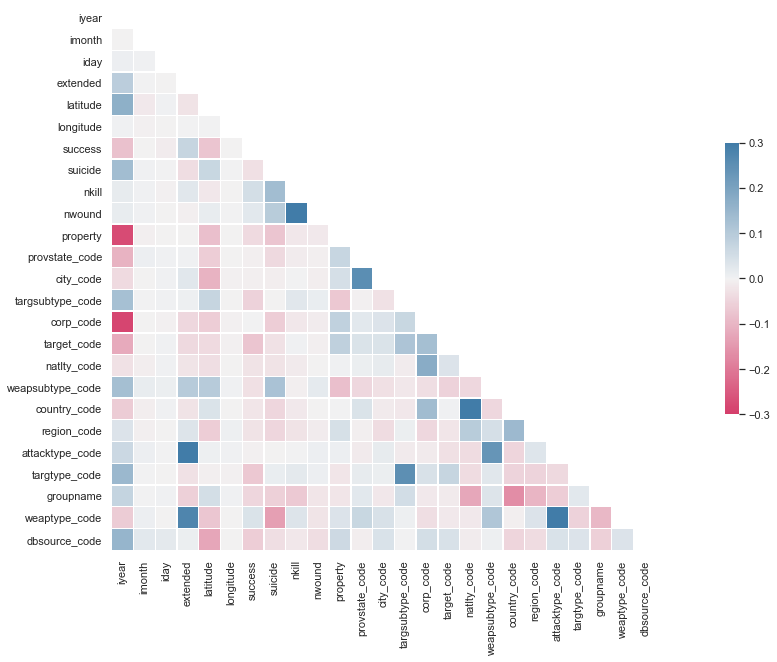

In [227]:
corr_matrix = data.corr()
abs(corr_matrix['suicide']).sort_values(ascending=False).head(10)

mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(25,10))
cmap = sns.diverging_palette(0,240, as_cmap = True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin = -.3, vmax=.3, center=0, square=True, linewidths=.3, cbar_kws={"shrink": .5})


In [ ]:
#NOT HIGHLY CORELATED DATA

LETS WORK WITH ANOVA TEST AND CHECK P_VALUE

In [252]:
def anovatest(data):
    for i in data:
        print(i)
        model = ols('suicide ~ C(b)', data).fit()
        print(model.summary())
        print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

    # Creates the ANOVA table
        res = sm.stats.anova_lm(model, typ= 2)
        print(res)

anovatest(data)


iyear
                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.04e-36
Time:                        22:56:43   Log-Likelihood:                 42658.
No. Observations:              175957   AIC:                        -8.531e+04
Df Residuals:                  175955   BIC:                        -8.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0536      0.001     39.650   

                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.04e-36
Time:                        22:56:46   Log-Likelihood:                 42658.
No. Observations:              175957   AIC:                        -8.531e+04
Df Residuals:                  175955   BIC:                        -8.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0536      0.001     39.650      0.0

                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.04e-36
Time:                        22:56:49   Log-Likelihood:                 42658.
No. Observations:              175957   AIC:                        -8.531e+04
Df Residuals:                  175955   BIC:                        -8.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0536      0.001     39.650      0.0

                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.04e-36
Time:                        22:56:52   Log-Likelihood:                 42658.
No. Observations:              175957   AIC:                        -8.531e+04
Df Residuals:                  175955   BIC:                        -8.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0536      0.001     39.650      0.0

                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.04e-36
Time:                        22:56:55   Log-Likelihood:                 42658.
No. Observations:              175957   AIC:                        -8.531e+04
Df Residuals:                  175955   BIC:                        -8.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0536      0.001     39.650      0.0

                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.04e-36
Time:                        22:56:58   Log-Likelihood:                 42658.
No. Observations:              175957   AIC:                        -8.531e+04
Df Residuals:                  175955   BIC:                        -8.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0536      0.001     39.650      0.0

                            OLS Regression Results                            
Dep. Variable:                suicide   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.04e-36
Time:                        22:57:01   Log-Likelihood:                 42658.
No. Observations:              175957   AIC:                        -8.531e+04
Df Residuals:                  175955   BIC:                        -8.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0536      0.001     39.650      0.0

In [ ]:
#USED ONE WAY ANOVA TEST, USING 2 VARIABLES ONE IS LABEL AND THE OTHER VARIABLES IN X

In [ ]:
#COULD'NT GET MUCH INFORMATION FROM ANOVA

In [ ]:
#LETS WORK WITH KFOLD, KFOLD SRATIFIED ALGORITHM FOR FEATURE SELECTION

In [255]:
# Validation metrics for classification
def validationmetrics(model, testX, testY, verbose=True):   
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    #Precision
    precision = precision_score(testY, predictions, pos_label=1, labels=[0,1])*100
    
    #Recall
    recall = recall_score(testY, predictions,pos_label=1,labels=[0,1])*100
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    auc_val = auc(fpr, tpr)
    
    #F-Score
    f_score = f1_score(testY, predictions)
    
    if verbose:
        print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n AUC: \n",auc_val)
        print("\n F-Score:\n", f_score)
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
    
    res_map = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "auc_val": auc_val,
                "f_score": f_score,
                "model_obj": model
              }
    return res_map


In [280]:
def XYsplit(data):
    y = data['suicide'].copy()
    X = data.drop('suicide',axis=1)
    return X,y

In [257]:
def traintestsplit(df,split,random=None, label_col=''):
    #make a copy of the label column and store in y
    y = df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)
    
    #manual split
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    return X, trainX, testX, trainY, testY

In [258]:
def GadientBoosting(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [259]:
def AdaBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [260]:
def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [261]:
def MultiLayerPerceptron(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = MLPClassifier(hidden_layer_sizes=5)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [262]:
def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [263]:
# For Cross Validation, lets create generator functions for different cross validation techniques, this will help us run an iterator over all folds
def cross_valid_kfold(X, y, split=10, random=None, shuffle=False):
    """
    Generator function for KFold cross validation
    
    """
    kf = KFold(n_splits=split, random_state=random, shuffle=shuffle)
    for train_index, test_index in kf.split(X):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        yield trainX,trainY,testX,testY

In [264]:
def cross_valid_repeated_kf(X, y, split=10, random=None, repeat=10):
    """
    Generator function for Repeated KFold cross validation
    
    """
    kf = RepeatedKFold(n_splits=split, random_state=random, n_repeats=repeat)
    for train_index, test_index in kf.split(X):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        yield trainX,trainY,testX,testY

In [265]:
def cross_valid_stratified_kf(X, y, split=10, random=None, shuffle=False):
    """
    Generator function for Stratified KFold cross validation
    
    """
    skf = StratifiedKFold(n_splits=split, random_state=random, shuffle=shuffle)
    for train_index, test_index in skf.split(X, y):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        yield trainX,trainY,testX,testY

In [266]:
def cross_valid_strat_shuffle_kf(X, y, split=10, random=None):
    """
    Generator function for StratifiedShuffle cross validation
    
    """
    sss = StratifiedShuffleSplit(n_splits=split, random_state=random)
    for train_index, test_index in sss.split(X, y):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        yield trainX,trainY,testX,testY

In [268]:
# Helper function to provide list of supported algorithms for Classification
def get_supported_algorithms():
    covered_algorithms = [GadientBoosting, AdaBoost,
                          RandomForest,
                          MultiLayerPerceptron]
    if XGBClassifier:
        covered_algorithms.append(XgBoost)
   
    return covered_algorithms

In [278]:
#With-{FS,CV}
def run_algorithms_cv(df, label_col, algo_list=get_supported_algorithms(), feature_list=[], cross_valid_method=cross_valid_stratified_kf):
   
   
    print("MULTI-LAYER PERCEPTRON")
    MultiLayerPerceptron(X_train, X_test, y_train, y_test,verbose=True, clf=None)
    
    print("RANDOM FOREST")
    RandomForest(X_train, X_test, y_train, y_test,verbose=True, clf=None)
    
    print("XGBOOST")
    XgBoost(X_train, X_test, y_train, y_test,verbose=True, clf=None)
    
    print("ADABOOST")
    AdaBoost(X_train, X_test, y_train, y_test,verbose=True, clf=None)
    
    

    X,y = XYsplit(data)
    
    # Select features if specified by driver program
    if feature_list:
        X = X[feature_list]
    
    result = {}
    algo_model_map = {}
    for algo in algo_list:
        clf = None
        result[algo.__name__] = dict()
        for trainX,trainY,testX,testY  in cross_valid_method(X, y, split=10):
            res_algo = algo(trainX, testX, trainY, testY, verbose=False, clf=clf)
            # Get trained model so we could use it again in the next iteration
            clf = res_algo.get("model_obj", None)
            
            for k,v in res_algo.items():
                if k == "model_obj":
                    continue
                if k not in result[algo.__name__].keys():
                    result[algo.__name__][k] = list()
                result[algo.__name__][k].append(v)
                
        algo_model_map[algo.__name__] = clf
            
    score_map = dict()
    # let take average scores for all folds now
    for algo, metrics in result.items():
        print("============ " + algo + " ===========")
        score_map[algo] = dict()
        for metric_name, score_lst in metrics.items():
            score_map[algo][metric_name] = np.mean(score_lst)
        print(score_map[algo])
        print ("============================== \n")
        score_map[algo]["model_obj"] = algo_model_map[algo]
    
    return score_map

In [281]:
run_algorithms_cv(data,'suicide', algo_list=get_supported_algorithms(), feature_list=[], cross_valid_method=cross_valid_stratified_kf)

MULTI-LAYER PERCEPTRON
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 96.32871107069788

 Precision of event Happening: 
 51.66666666666667

 Recall of event Happening: 
 7.164869029275808

 AUC: 
 0.5345409321529287

 F-Score:
 0.12584573748308525

 Confusion Matrix: 
 [[33807    87]
 [ 1205    93]]
RANDOM FOREST
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 99.05660377358491

 Precision of event Happening: 
 92.5925925925926

 Recall of event Happening: 
 80.89368258859785

 AUC: 
 0.9032292555700029

 F-Score:
 0.8634868421052632

 Confusion Matrix: 
 [[33810    84]
 [  248  1050]]
XGBOOST


C:\Users\hifza\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 98.75255739940896

 Precision of event Happening: 
 88.17777777777778

 Recall of event Happening: 
 76.42526964560862

 AUC: 
 0.8801643490541481

 F-Score:
 0.8188196450680973

 Confusion Matrix: 
 [[33761   133]
 [  306   992]]
ADABOOST
Prediction Vector: 
 [0 0 0 ... 0 0 0]

 Accuracy: 
 98.89463514435099

 Precision of event Happening: 
 87.84346378018319

 Recall of event Happening: 
 81.2788906009245

 AUC: 
 0.9042406794753842

 F-Score:
 0.8443377350940375

 Confusion Matrix: 
 [[33748   146]
 [  243  1055]]


C:\Users\hifza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hifza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hifza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hifza\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

[00:04:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'GadientBoosting': {'accuracy': 95.95922269398976,
  'precision': 65.42873770279947,
  'recall': 74.60277279624776,
  'auc_val': 0.8569711148078802,
  'f_score': 0.6357946322132582,
  'model_obj': GradientBoostingClassifier()},
 'AdaBoost': {'accuracy': 92.15867181185936,
  'precision': 69.58549506702829,
  'recall': 70.25424196440888,
  'auc_val': 0.8163337983907738,
  'f_score': 0.6124660257223009,
  'model_obj': AdaBoostClassifier(n_estimators=100, random_state=0)},
 'RandomForest': {'accuracy': 94.31673845892666,
  'precision': 72.37479159005889,
  'recall': 66.2683358624178,
  'auc_val': 0.8083905692506814,
  'f_score': 0.5804094686148542,
  'model_obj': RandomForestClassifier()},
 'MultiLayerPerceptron': {'accuracy': 96.20759423028859,
  'precision': 18.48618890220721,
  'recall': 3.534648457258472,
  'auc_val': 0.5167609843741526,
  'f_score': 0.047925432946901395,
  'model_obj': MLPClassifier(hidden_layer_sizes=5)},
 'XgBoost': {'accuracy': 92.92593417308345,
  'precision': 73

In [ ]:
#AFTER ANALYZING THE ACCURACY and AUC OF MULTIPLE ALGORIHMS, I'D GO WITH XGBOOST CLASSIFIER.

In [ ]:
#My measure in this case is AUC and accuracy, because I care equally about positive and negative classes.